# Rented Bike Count prediction

In [68]:
# importing the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, make_scorer
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

from joblib import load
from joblib import dump

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor


In [69]:
data = pd.read_csv('data.csv')

In [70]:
# setting max display column limit to max
pd.set_option('display.max_columns',None)

In [71]:
data.head()

,id,Date,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat10,Functioning Day,Holiday,Hour,Humidity,Rainfall,Rented Bike Count,Seasons,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed
0,1,08/11/2018,8.8,0.585382,0.026140,0.920350,0.315114,0.977342,0.169791,0.656922,0.424366,0.094453,Yes,No Holiday,8,89,0.0,148,Autumn,0.0,0.02,10.6,689,1.5
1,2,26/09/2018,8.9,0.730931,0.066437,0.349515,0.456733,0.822811,0.471541,0.424646,0.382840,0.265271,Yes,No Holiday,7,62,0.0,335,Autumn,0.0,0.01,16.3,2000,2.0
2,3,12/01/2018,-18.5,0.826907,0.325077,0.772166,0.918194,0.994359,0.239573,0.535647,0.559941,0.521045,Yes,No Holiday,22,39,0.0,186,Winter,0.0,0.00,-6.9,2000,1.6
3,4,26/07/2018,24.8,0.115778,0.793062,0.259372,0.797660,0.109027,0.657459,0.522908,0.681320,0.857812,Yes,No Holiday,21,74,0.0,1868,Summer,0.0,0.00,30.0,1056,2.7
4,5,26/05/2018,9.1,0.319288,0.842444,0.001954,0.976224,0.898576,0.036342,0.525282,0.674364,0.198360,Yes,No Holiday,13,31,0.0,1441,Spring,0.0,3.29,27.8,1326,2.0


In [72]:
print(f'the dataset has {data.shape[0]} rows and {data.shape[1]} columns')

the dataset has 11680 rows and 24 columns


In [73]:
#Converting Date column format

data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11680 entries, 0 to 11679
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     11680 non-null  int64         
 1   Date                   11680 non-null  datetime64[ns]
 2   Dew point temperature  11680 non-null  float64       
 3   feat01                 11680 non-null  float64       
 4   feat02                 11680 non-null  float64       
 5   feat03                 11680 non-null  float64       
 6   feat04                 11680 non-null  float64       
 7   feat05                 11680 non-null  float64       
 8   feat06                 11680 non-null  float64       
 9   feat07                 11680 non-null  float64       
 10  feat08                 11680 non-null  float64       
 11  feat10                 11680 non-null  float64       
 12  Functioning Day        11680 non-null  object        
 13  H

In [75]:
X_names = [col for col in data.columns if col != 'Rented Bike Count']

In [76]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=12345)

print(f"train data shape: {train_data.shape}")
print(f"test data shape: {test_data.shape}")

train data shape: (9344, 24)
test data shape: (2336, 24)


In [77]:
X_train = train_data[X_names]
X_test = test_data[X_names]

y_train = train_data[['Rented Bike Count']]
y_test = test_data[['Rented Bike Count']]

#### Overall trend of Rented Bike demand

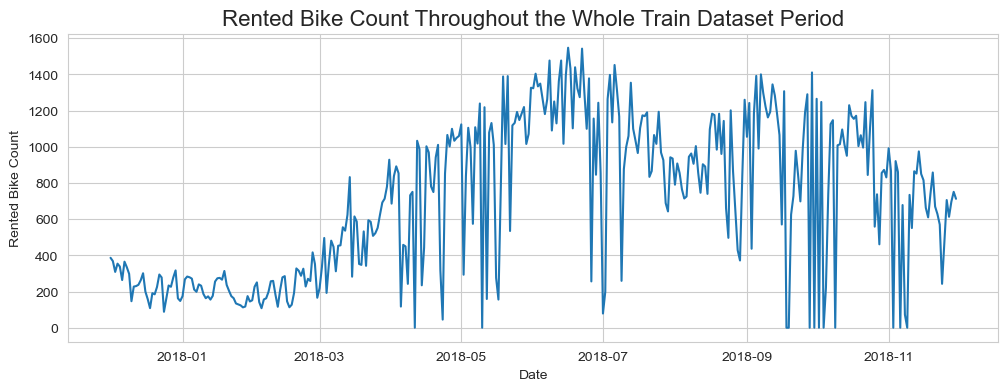

In [78]:
# overall trend of Rented Bike Count  

plt.figure(figsize=(12,4))
sns.lineplot(data=train_data,x='Date',y='Rented Bike Count',palette='pastel',ci=None)
plt.title('Rented Bike Count Throughout the Whole Train Dataset Period',size=16)
plt.show()

#### getting the information about the year, month and the day of the week from the Date column

In [79]:
train_data['Month'] = train_data['Date'].dt.month
train_data['Year'] = train_data['Date'].dt.year
train_data['DayOfWeek'] = train_data['Date'].dt.day_name()

# dropping Date variable 
train_data.drop(columns='Date',inplace=True)

# same for the test data

test_data['Month'] = test_data['Date'].dt.month
test_data['Year'] = test_data['Date'].dt.year
test_data['DayOfWeek'] = test_data['Date'].dt.day_name()

# removing the Date 
test_data.drop(columns='Date',inplace=True)

In [80]:
train_data['Hour']=train_data['Hour'].astype('category')
train_data['Month']=train_data['Month'].astype('category')
train_data['Year']=train_data['Year'].astype('category')
train_data['DayOfWeek']=train_data['DayOfWeek'].astype('category')

test_data['Hour']=test_data['Hour'].astype('category')
test_data['Month']=test_data['Month'].astype('category')
test_data['Year']=test_data['Year'].astype('category')
test_data['DayOfWeek']=test_data['DayOfWeek'].astype('category')

In [81]:
numeric_features= train_data.select_dtypes(exclude=['object','category'])
categorical_features=train_data.select_dtypes(include=['object','category'])

#### removing the id column as it has no value for prediction

In [82]:
train_data.drop(columns='id',inplace=True)
test_data.drop(columns='id',inplace=True)

In [83]:
train_data.describe()

,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat10,Humidity,Rainfall,Rented Bike Count,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed
count,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000,9344.000000
mean,0.795569,0.502962,0.493162,0.496201,0.502130,0.501210,0.506568,0.506063,0.477600,0.497634,56.750535,0.121586,602.053510,0.105854,0.527871,9.770484,1417.355629,1.770666
std,13.533536,0.290157,0.289775,0.288526,0.289258,0.288931,0.289464,0.124571,0.129257,0.286855,20.444152,1.010565,599.178063,0.499709,0.833419,12.319994,621.154268,1.060266
min,-30.600000,0.000060,0.000245,0.000041,0.000038,0.000313,0.000463,0.025197,0.027156,0.000126,0.000000,0.000000,0.000000,0.000000,0.000000,-17.800000,27.000000,0.000000
25%,-9.900000,0.248316,0.243265,0.247865,0.250733,0.254167,0.254558,0.423503,0.390459,0.252032,40.000000,0.000000,169.000000,0.000000,0.000000,0.100000,887.000000,1.000000
50%,0.800000,0.501985,0.485420,0.491076,0.501323,0.502599,0.514122,0.507119,0.475609,0.498669,55.000000,0.000000,364.000000,0.000000,0.000000,8.600000,1674.500000,1.600000
75%,11.700000,0.755502,0.742754,0.745002,0.754574,0.749693,0.756218,0.588799,0.564356,0.743150,73.000000,0.000000,900.000000,0.000000,0.840000,20.100000,1998.000000,2.400000
max,27.200000,0.999985,0.999982,0.999993,0.999972,0.999842,0.999929,1.000000,1.000000,0.999875,98.000000,35.000000,3556.000000,8.800000,3.520000,39.400000,2000.000000,7.400000


#### Checking for missing observations

In [84]:
print(f"train dataset NAs: \n{train_data.isnull().sum()}")
print(f"test dataset NAs: \n{test_data.isnull().sum()}")

train dataset NAs: 
Dew point temperature    0
feat01                   0
feat02                   0
feat03                   0
feat04                   0
feat05                   0
feat06                   0
feat07                   0
feat08                   0
feat10                   0
Functioning Day          0
Holiday                  0
Hour                     0
Humidity                 0
Rainfall                 0
Rented Bike Count        0
Seasons                  0
Snowfall                 0
Solar Radiation          0
Temperature              0
Visibility               0
Wind speed               0
Month                    0
Year                     0
DayOfWeek                0
dtype: int64
test dataset NAs: 
Dew point temperature    0
feat01                   0
feat02                   0
feat03                   0
feat04                   0
feat05                   0
feat06                   0
feat07                   0
feat08                   0
feat10                   0
Fun

no missing observations

In [85]:
# recoding Holiday to 0-1

train_data['Holiday'] = train_data['Holiday'].map({'Holiday':1, 'No Holiday':0})
test_data['Holiday'] = test_data['Holiday'].map({'Holiday':1, 'No Holiday':0})

train_data['Holiday'] = train_data['Holiday'].astype('category')
test_data['Holiday'] = test_data['Holiday'].astype('category')

In [86]:
train_data['Holiday'] = train_data['Holiday'].astype('object')
test_data['Holiday'] = test_data['Holiday'].astype('object')

In [87]:
train_data.head()

,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat10,Functioning Day,Holiday,Hour,Humidity,Rainfall,Rented Bike Count,Seasons,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed,Month,Year,DayOfWeek
6493,-4.5,0.975430,0.330453,0.327282,0.479463,0.495650,0.425450,0.451490,0.606052,0.075210,Yes,0,2,76,0.0,115,Winter,0.0,0.0,-0.8,421,0.8,2,2018,Tuesday
11403,-22.0,0.519150,0.473480,0.611783,0.976759,0.469786,0.376441,0.346359,0.429499,0.844651,Yes,0,0,49,0.0,105,Winter,0.0,0.0,-13.6,2000,1.6,1,2018,Friday
3979,8.0,0.628706,0.926744,0.217407,0.345372,0.551021,0.714114,0.532105,0.628702,0.456817,Yes,0,15,27,0.0,1877,Autumn,0.0,2.9,28.9,2000,1.8,9,2018,Sunday
3734,-12.7,0.738472,0.665080,0.962146,0.370996,0.861946,0.474721,0.502792,0.148124,0.438746,Yes,0,13,34,0.0,265,Winter,0.0,0.5,1.4,1394,0.8,1,2018,Sunday
7058,-3.6,0.771234,0.058649,0.333557,0.434152,0.242245,0.292638,0.637698,0.481357,0.390080,Yes,1,6,84,0.0,25,Winter,1.2,0.0,-1.3,425,2.4,12,2017,Sunday


In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9344 entries, 6493 to 4578
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Dew point temperature  9344 non-null   float64 
 1   feat01                 9344 non-null   float64 
 2   feat02                 9344 non-null   float64 
 3   feat03                 9344 non-null   float64 
 4   feat04                 9344 non-null   float64 
 5   feat05                 9344 non-null   float64 
 6   feat06                 9344 non-null   float64 
 7   feat07                 9344 non-null   float64 
 8   feat08                 9344 non-null   float64 
 9   feat10                 9344 non-null   float64 
 10  Functioning Day        9344 non-null   object  
 11  Holiday                9344 non-null   object  
 12  Hour                   9344 non-null   category
 13  Humidity               9344 non-null   int64   
 14  Rainfall               9344 non-null   flo

## Explanatory Data Analysis

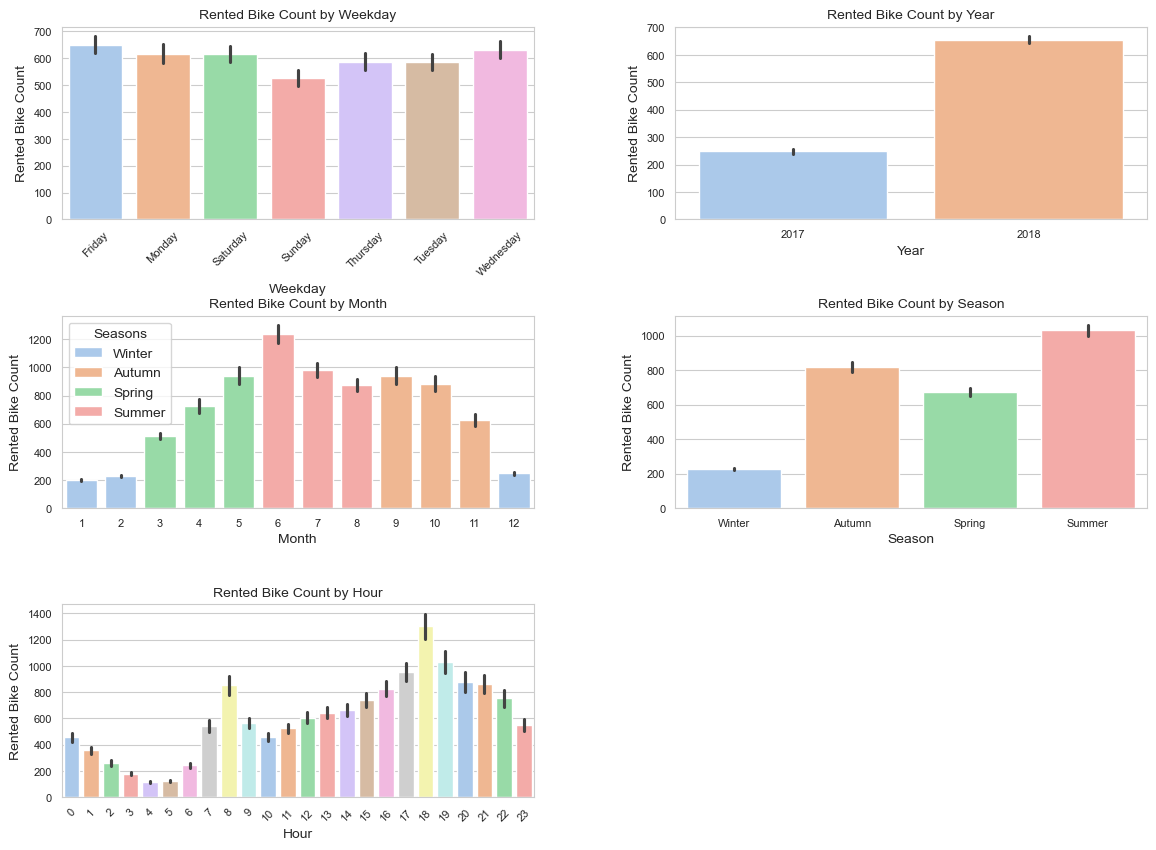

In [89]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3, 2, figsize=(14, 10)) 
fig.subplots_adjust(hspace=0.5, wspace=0.3)

sns.barplot(data=train_data, x = 'DayOfWeek', y ='Rented Bike Count',palette='pastel', ax=ax[0,0])
ax[0,0].set_title('Rented Bike Count by Weekday', fontsize=10)
ax[0,0].set_ylabel('Rented Bike Count', fontsize=10)
ax[0,0].set_xlabel('Weekday', fontsize=10)
ax[0,0].tick_params(axis='x', labelsize=8, rotation=45)  
ax[0,0].tick_params(axis='y', labelsize=8) 


sns.barplot(data=train_data, x = 'Year', y ='Rented Bike Count',palette='pastel', ax=ax[0,1])
ax[0,1].set_title('Rented Bike Count by Year',fontsize=10)
ax[0,1].set_ylabel('Rented Bike Count', fontsize=10)
ax[0,1].set_xlabel('Year', size=10)
ax[0,1].tick_params(labelsize=8)
ax[0,1].tick_params(labelsize=8)


sns.barplot(data=train_data, x = 'Month', y ='Rented Bike Count',palette='pastel',hue='Seasons', ax=ax[1,0])
ax[1,0].set_title('Rented Bike Count by Month',fontsize=10)
ax[1,0].set_ylabel('Rented Bike Count', fontsize=10)
ax[1,0].set_xlabel('Month', fontsize=10)
ax[1,0].tick_params(labelsize=8)
ax[1,0].tick_params(labelsize=8)


sns.barplot(data=train_data, x = 'Seasons', y ='Rented Bike Count',palette='pastel', ax=ax[1,1])
ax[1,1].set_title('Rented Bike Count by Season',fontsize=10)
ax[1,1].set_ylabel('Rented Bike Count', fontsize=10)
ax[1,1].set_xlabel('Season', fontsize=10)
ax[1,1].tick_params(labelsize=8)
ax[1,1].tick_params(labelsize=8)

sns.barplot(data=train_data, x = 'Hour', y ='Rented Bike Count',palette='pastel', ax=ax[2,0])
ax[2,0].set_title('Rented Bike Count by Hour', fontsize=10)
ax[2,0].set_ylabel('Rented Bike Count', fontsize=10)
ax[2,0].set_xlabel('Hour', fontsize=10)
ax[2,0].tick_params(axis='x', labelsize=8, rotation=45)  
ax[2,0].tick_params(axis='y', labelsize=8) 

ax[2,1].axis('off')

plt.show()



- **Bike rentals are usually higher on weekdays than weekends**, indicating a strong connection to work or school commutes (more visible for sundays than saturdays). 
- **Year-over-year growth:** The rental count in 2018 is more than double that of 2017.
- **High seasonality:**  summer showing peak activity and winter experiencing the lowest demand. This suggests that weather conditions play a crucial role in influencing bike usage trends.

further actions: 
- clustering hours into a few groups 
- grouping months based on the demand / leaving only one of the two variables: season or month
- creating a weekend/weekday binary variable

Hour is a categorical variable with 24 unique values. Recoding it into dummies would create 23  binary features, which could increase the dimensionality of the dataset significantly. This may lead to overfitting in models, especially if some hours are sparsely represented or not strongly correlated with the target variable. 

To address this, clustering hours into broader categories can reduce the number of features while preserving meaningful patterns. 

KMeans clustering is implemented to group hours based on their average bike rental counts. 

K is set to 4 based on visual observations of patterns in the data. The choice of 4 clusters aims to capture key trends, such as morning and evening peaks, and periods of lower activity during the night and midday.

#### Clustering Hours

In [90]:
# clustering only on the training data
hourly_means_train = train_data.groupby('Hour').mean(numeric_only=True).reset_index()
kmeans = KMeans(n_clusters=4, random_state=12345)
hourly_means_train['Cluster'] = kmeans.fit_predict(hourly_means_train[['Rented Bike Count']])

# Mapping the clusters back to both the train and test sets (clustering was performed solely based on the information from the train set).

hour_to_cluster = hourly_means_train.set_index('Hour')['Cluster']
train_data['Hour_Group_Cluster'] = train_data['Hour'].map(hour_to_cluster)
test_data['Hour_Group_Cluster'] = test_data['Hour'].map(hour_to_cluster)

In [91]:
print("Hour variable clustering results: " )
hourly_means_train = hourly_means_train.sort_values(by='Cluster')
hourly_means_train[['Hour','Cluster']]

Hour variable clustering results: 


,Hour,Cluster
21,21,0
8,8,0
20,20,0
17,17,0
22,22,0
16,16,0
15,15,0
1,1,1
2,2,1
3,3,1


- Cluster 0 (Hours 8,15–17, 20–22): high bike rental activity, corresponding to morning commuting hours and evening peak times.

- Cluster 1 (Hours 1-6): very low activity, as these hours generally to nighttime or early mornings when bike rentals are minimal.

- Cluster 2 (Hours 0, 7, 9–14, 23): moderate activity, covering late-night activity or daytime hours with steady but not peak rental demand.

- Cluster 3 (Hours 18 and 19): evening rush hours, with the highest bike rental activity.

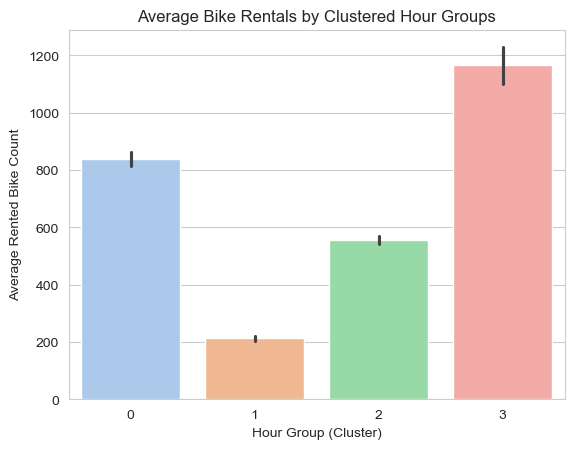

In [92]:
sns.set_style("whitegrid")

sns.barplot(data=train_data, x = 'Hour_Group_Cluster', y ='Rented Bike Count',palette='pastel')
plt.title("Average Bike Rentals by Clustered Hour Groups")
plt.xlabel("Hour Group (Cluster)")
plt.ylabel("Average Rented Bike Count")
plt.show()


In [93]:
train_data['Hour_Group_Cluster'] = train_data['Hour_Group_Cluster'].astype('object')
test_data['Hour_Group_Cluster'] = test_data['Hour_Group_Cluster'].astype('object')

#### Clustering Months

Analogous clustering analysis can be performed on the "Months" variable, which has 12 unique values, so encoding it to dummies would also increase the dimensionality of the data. 

In [94]:
monthly_means_train = train_data.groupby('Month').mean(numeric_only=True).reset_index()
kmeans2 = KMeans(n_clusters=4, random_state=12345)
monthly_means_train['Cluster'] = kmeans2.fit_predict(monthly_means_train[['Rented Bike Count']])

# Mapping the clusters back to both the train and test sets (clustering was performed solely based on the information from the train set).
month_to_cluster = monthly_means_train.set_index('Month')['Cluster']
train_data['Month_Group_Cluster'] = train_data['Month'].map(month_to_cluster)
test_data['Month_Group_Cluster'] = test_data['Month'].map(month_to_cluster)

In [95]:
print("Month variable clustering results: " )
monthly_means_train = monthly_means_train.sort_values(by='Cluster')
monthly_means_train[['Month','Cluster']]

Month variable clustering results: 


,Month,Cluster
0,1,0
1,2,0
11,12,0
4,5,1
6,7,1
7,8,1
8,9,1
9,10,1
2,3,2
3,4,2


- Cluster 0 (Months 1, 2, 12): winter months with the lowest bike rental counts, which aligns with colder weather reducing outdoor activities.

- Cluster 1 (Months 5, 6, 7, 8, 9, 10): late spring to early autumn months with high bike rentals, suggesting when weather and conditions are good for cycling. 

- Cluster 2 (Months 3, 4, 11): months (spring and late autumn) with moderate rental activity, reflecting partial suitability for outdoor activities.

- Cluster 3 (Month 6): A distinct cluster with the highest bike rentals count, representing the peak summer month (June) when weather and conditions are probably ideal for cycling.

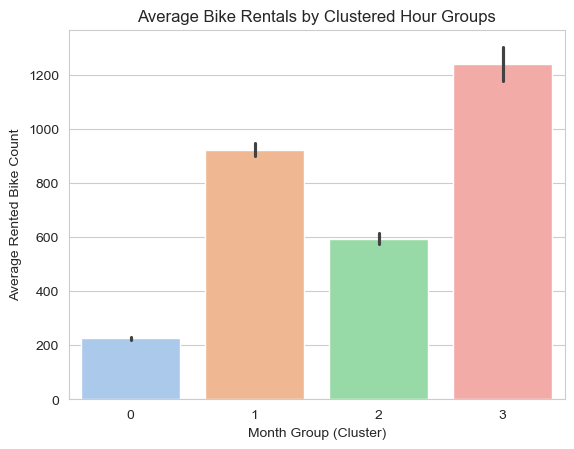

In [96]:
sns.set_style("whitegrid")

sns.barplot(data=train_data, x = 'Month_Group_Cluster', y ='Rented Bike Count',palette='pastel')
plt.title("Average Bike Rentals by Clustered Hour Groups")
plt.xlabel("Month Group (Cluster)")
plt.ylabel("Average Rented Bike Count")
plt.show()

In [97]:
train_data['Month_Group_Cluster'] = train_data['Month_Group_Cluster'].astype('object')

In [98]:
test_data['Month_Group_Cluster'] = test_data['Month_Group_Cluster'].astype('object')
print(test_data[['Month', 'Month_Group_Cluster']].head())

      Month Month_Group_Cluster
4112      2                   0
4250     11                   2
1829      2                   0
5354      3                   2
10108     2                   0


#### Creating a weekend/weekday binary variable (weekend is 1, weekday is 0)

In [99]:
train_data['Weekend'] = train_data['DayOfWeek'].apply(lambda x: 1 if x == 'Sunday' or x=='Saturday' else 0)
train_data.drop(columns=['DayOfWeek'],inplace=True)

test_data['Weekend'] = test_data['DayOfWeek'].apply(lambda x: 1 if x == 'Sunday' or x=='Saturday' else 0)
test_data.drop(columns=['DayOfWeek'],inplace=True)


#### Functional vs Non-Functional Days

In [100]:
train_data['Functioning Day'].value_counts()

Functioning Day
Yes    9108
No      236
Name: count, dtype: int64

<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

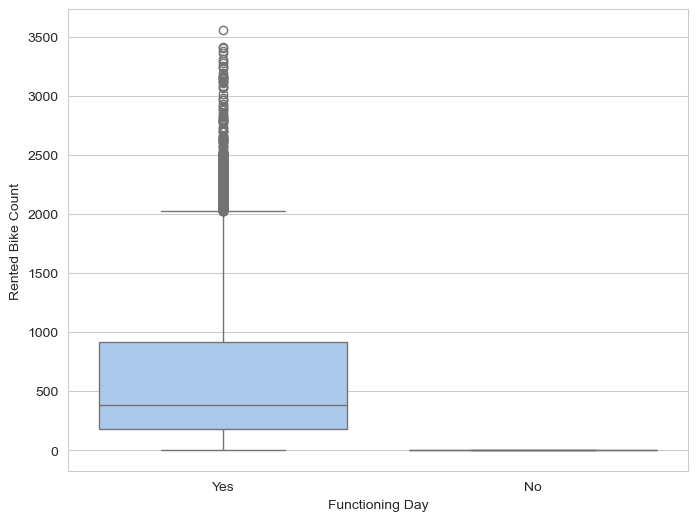

In [101]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train_data,x='Functioning Day', y='Rented Bike Count',palette='pastel')

In [102]:
non_func_days = train_data[train_data['Functioning Day'] == 'No']
total_rentals_non_func = non_func_days['Rented Bike Count'].sum()
print("Total number of bikes rented on Non-Functional Days:", total_rentals_non_func)
avg_rentals_non_func = non_func_days['Rented Bike Count'].mean()
print("Average Rented Bike Count on Non-Functional Days:", avg_rentals_non_func)

Total number of bikes rented on Non-Functional Days: 0
Average Rented Bike Count on Non-Functional Days: 0.0


Non-functional days consistently have zero bike rentals.


We can exclude the non-functional days (Functioning Day == 0) during the training of our model since they contribute no variability to the target variable. 
After submitting our final predictions, we can simply set the output for all non-functional days to 0 manually.

We adopt the following approach:

1. We exclude all rows where Functioning Day == 0 from the training data. 
- This allows the model to focus on learning the relationship between features and the target variable for functional days only, where variability exist.
- The Functioning Day variable is removed as it becomes redundant after excluding non-functional days.

2. Predictions: functional and non-functional days predictions are handled separately:
- For rows where Functioning Day == 1, we use the trained model to predict bike rentals.
- For rows where Functioning Day == 0, we directly set the prediction to 0, as this is a known  outcome.


In [103]:
# Filtering training data
train_data = train_data[train_data['Functioning Day'] == 'Yes']
train_data = train_data.drop(columns=['Functioning Day'])

# Separating test data by Functioning Day
test_functioning_yes = test_data[test_data['Functioning Day'] == 'Yes'].drop(columns=['Functioning Day'])
test_functioning_no = test_data[test_data['Functioning Day'] == 'No']

print(f"Updated train dataset shape: {train_data.shape}")

Updated train dataset shape: (9108, 26)


In [104]:
# updating X_train and y_train 
X_names = [col for col in train_data.columns if col != 'Rented Bike Count']

X_train = train_data[X_names]
y_train = train_data[['Rented Bike Count']]

X_test = test_functioning_yes[X_names]
y_test = test_functioning_yes[['Rented Bike Count']]

print(f"train data shape: {train_data.shape}")

train data shape: (9108, 26)


#### Holiday vs Non-Holiday demand:

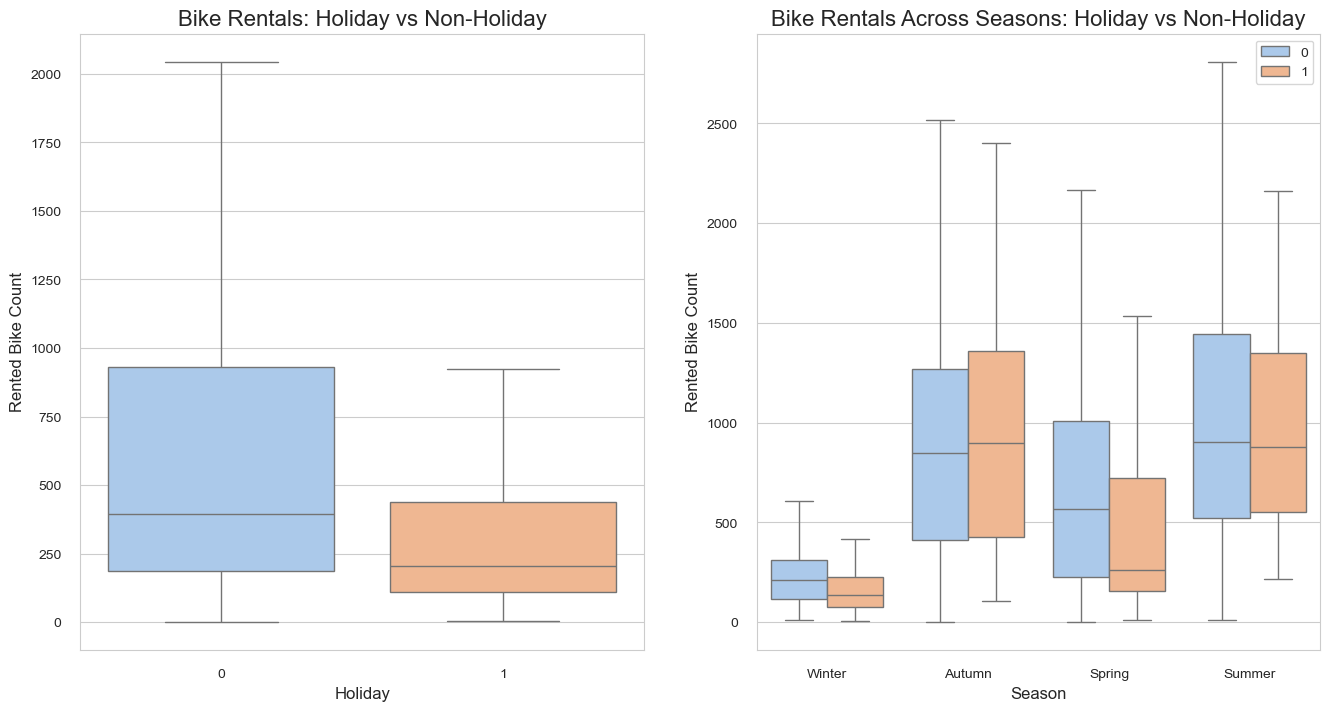

In [105]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(16,8)) 


sns.boxplot(data=train_data, x='Holiday', y='Rented Bike Count', palette='pastel',showfliers=False,ax=ax[0])
ax[0].set_title('Bike Rentals: Holiday vs Non-Holiday', fontsize=16)
ax[0].set_xlabel('Holiday',fontsize=12)
ax[0].set_ylabel('Rented Bike Count',fontsize=12)
ax[0].tick_params(axis='x',size=10)
ax[0].tick_params(axis='y',size=10)

sns.boxplot(data=train_data, x='Seasons', y='Rented Bike Count', hue='Holiday', palette='pastel',showfliers=False, ax=ax[1])
ax[1].set_title('Bike Rentals Across Seasons: Holiday vs Non-Holiday', fontsize=16)
ax[1].set_xlabel('Season',fontsize=12)
ax[1].set_ylabel('Rented Bike Count',fontsize=12)
ax[1].legend(title='',fontsize=10)
ax[1].tick_params(axis='x',size=10)
ax[1].tick_params(axis='y',size=10)

- the overall comparison between holidays and non-holidays across all seasons does reveal a significant difference in bike rentals:

     *  Median and interquartile ranges (IQR) for non-holidays are significantly higher --> Non-holidays show greater variability and more outliers, suggesting higher overall demand for bike rentals on regular days.
     * Holidays consistently have a lower median bike rental count and smaller variability compared to non-holidays.

- bike rentals do not differ significantly between holidays and non-holidays across seasons. 


**conclusion:** Holidays have a significantly lower bike rental count overall, which suggests that bike-sharing demand is largely driven by commuting during non-holiday days. The strong difference in overall rentals highlights that holidays are an important factor when predicting bike demand.

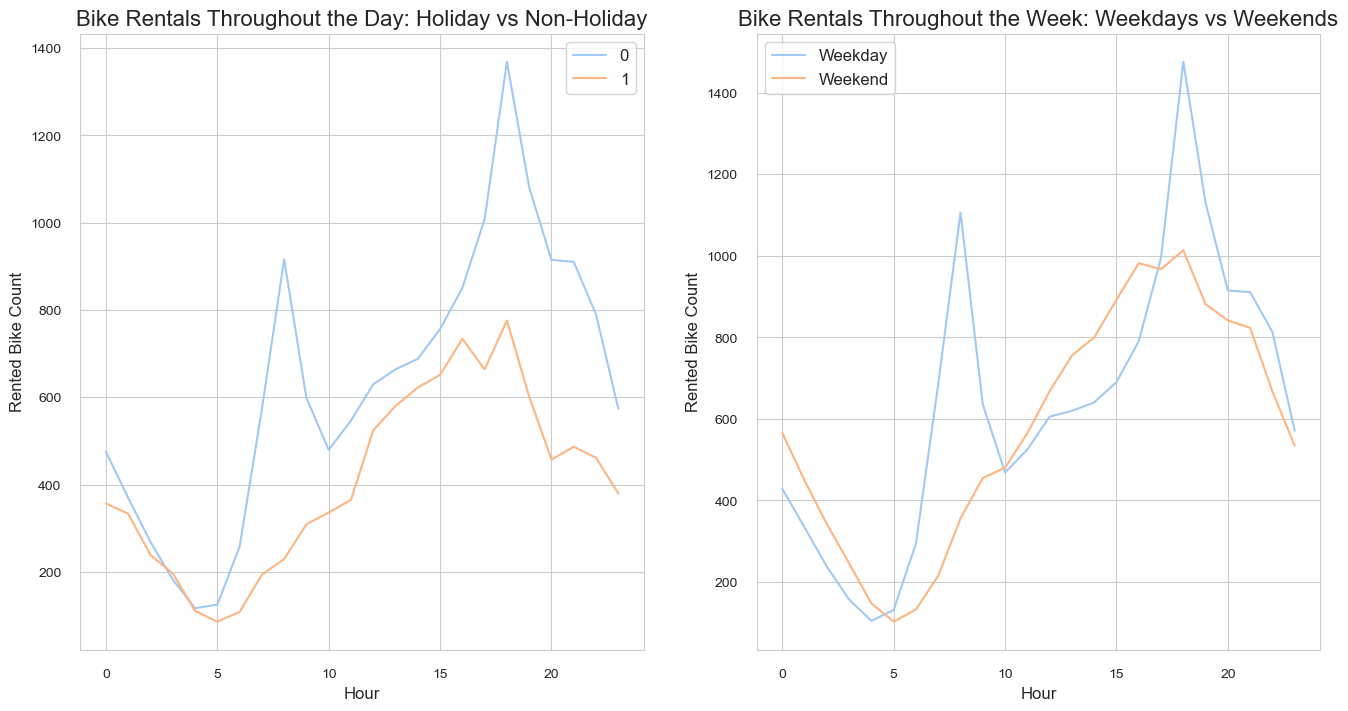

In [106]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(16,8)) 


sns.lineplot(data=train_data, x='Hour', y='Rented Bike Count', hue='Holiday',palette='pastel',ax=ax[0],ci=None)
ax[0].set_title('Bike Rentals Throughout the Day: Holiday vs Non-Holiday', fontsize=16)
ax[0].set_xlabel('Hour',fontsize=12)
ax[0].set_ylabel('Rented Bike Count',fontsize=12)
ax[0].legend(title='',fontsize=12)
ax[0].tick_params(axis='x',size=10)
ax[0].tick_params(axis='y',size=10)

sns.lineplot(data=train_data, x='Hour', y='Rented Bike Count', hue='Weekend', palette='pastel', ax=ax[1],ci=None)
ax[1].set_title('Bike Rentals Throughout the Week: Weekdays vs Weekends', fontsize=16)
ax[1].set_xlabel('Hour',fontsize=12)
ax[1].set_ylabel('Rented Bike Count',fontsize=12)
ax[1].legend(title='',fontsize=10)
handles, labels = plt.gca().get_legend_handles_labels()
ax[1].legend(handles, ['Weekday', 'Weekend'], title='', fontsize=12)
ax[1].tick_params(axis='x',size=10)
ax[1].tick_params(axis='y',size=10)

- Weekdays and non-holidays have strong peaks in demand during commuting hours.
- Weekends and holidays lack these peaks, with demand more evenly spread across the day, with no sharp peaks, instead increasing more steadily.
- Weekday rentals are significantly higher than weekend rentals during commuting hours, highlighting the reliance on bike-sharing for commute.
- Both weekends and holidays show sustained but lower usage, concentrated in the afternoon hours, likely reflecting entertainment activities.

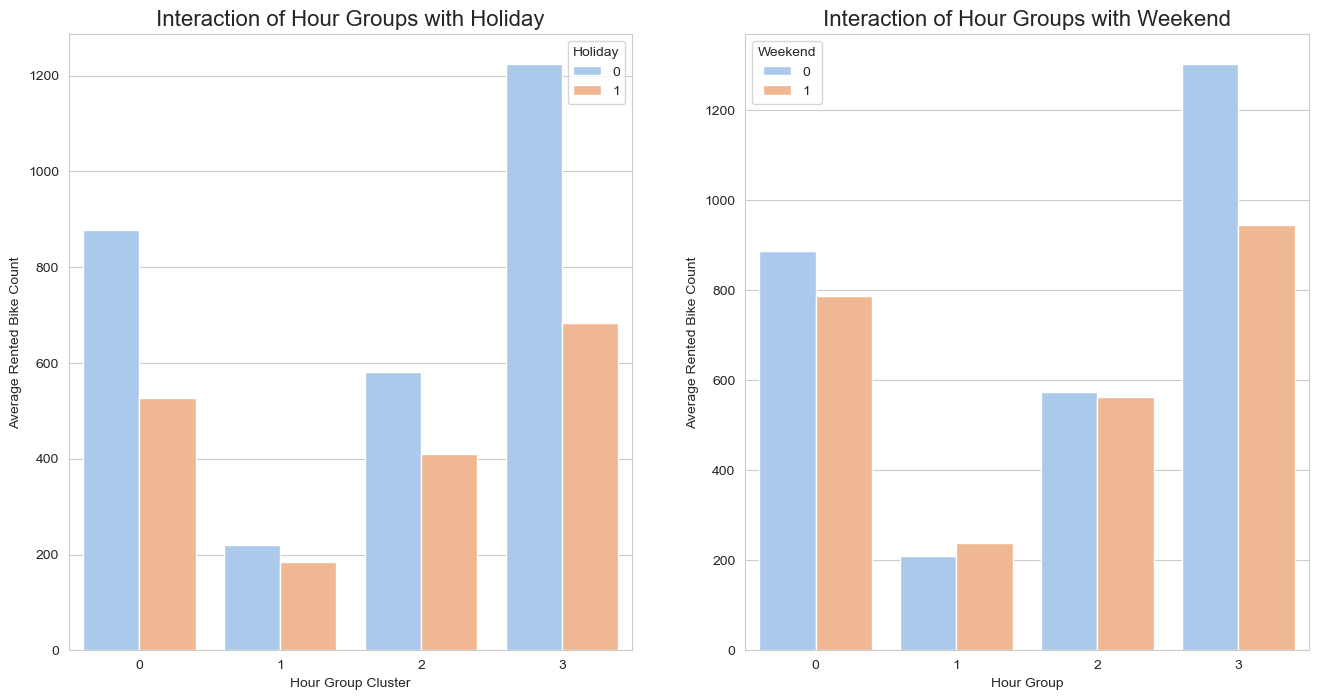

In [107]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(16,8)) 

sns.barplot(data=train_data,x="Hour_Group_Cluster",y="Rented Bike Count",hue="Holiday", palette='pastel',ax=ax[0],ci=None)
ax[0].set_title("Interaction of Hour Groups with Holiday",fontsize=16)
ax[0].set_xlabel("Hour Group Cluster")
ax[0].set_ylabel("Average Rented Bike Count")
ax[0].tick_params(axis='x')

# Wykres 2: Interakcja Hour Group z Weekend
sns.barplot(data=train_data,x="Hour_Group_Cluster",y="Rented Bike Count",hue="Weekend",palette='pastel',ax=ax[1],ci=None)
ax[1].set_title("Interaction of Hour Groups with Weekend",fontsize=16)
ax[1].set_xlabel("Hour Group")
ax[1].set_ylabel("Average Rented Bike Count")
ax[1].tick_params(axis='x')

plt.show()

On holidays, the demand for bike rentals decreases across all hour groups, with the most pronounced drop in Group 3 (evening peak at 18:00). Similarly, weekends show a shift in demand patterns, with Group 3 maintaining high rental counts, while other groups experience a relatively balanced reduction compared to weekdays. Including these interactions in the model allows it to capture context-specific variations in demand, such as the reduced activity during holidays or differing weekend usage patterns. This can enhance the model's overall performance.

In [108]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9108 entries, 6493 to 4578
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Dew point temperature  9108 non-null   float64 
 1   feat01                 9108 non-null   float64 
 2   feat02                 9108 non-null   float64 
 3   feat03                 9108 non-null   float64 
 4   feat04                 9108 non-null   float64 
 5   feat05                 9108 non-null   float64 
 6   feat06                 9108 non-null   float64 
 7   feat07                 9108 non-null   float64 
 8   feat08                 9108 non-null   float64 
 9   feat10                 9108 non-null   float64 
 10  Holiday                9108 non-null   object  
 11  Hour                   9108 non-null   category
 12  Humidity               9108 non-null   int64   
 13  Rainfall               9108 non-null   float64 
 14  Rented Bike Count      9108 non-null   int

#### Adding interactions between Hour_Group_Cluster and Holiday and Hour_Group_Cluster and Weekend

In [109]:
# Adding interactions between Hour_Group_Cluster and Holiday
train_data['Hour_Holiday_Interaction'] = (
    train_data['Hour_Group_Cluster'].astype(str) + "_" + train_data['Holiday'].astype(str)
)

# Adding interactions between Hour_Group_Cluster and Weekend
train_data['Hour_Weekend_Interaction'] = (
    train_data['Hour_Group_Cluster'].astype(str) + "_" + train_data['Weekend'].astype(str)
)


# encoding the interactions as dummy variables
hour_holiday_dummies = pd.get_dummies(train_data['Hour_Holiday_Interaction'], prefix='Hour_Holiday')
hour_weekend_dummies = pd.get_dummies(train_data['Hour_Weekend_Interaction'], prefix='Hour_Weekend')

# Concatenating the dummy variables with the original dataset
train_data = pd.concat([train_data, hour_holiday_dummies, hour_weekend_dummies], axis=1)


# same for the test dataset


# Adding interactions between Hour_Group_Cluster and Holiday
test_functioning_yes['Hour_Holiday_Interaction'] = (
    test_functioning_yes['Hour_Group_Cluster'].astype(str) + "_" + test_functioning_yes['Holiday'].astype(str)
)

# Adding interactions between Hour_Group_Cluster and Weekend
test_functioning_yes['Hour_Weekend_Interaction'] = (
    test_functioning_yes['Hour_Group_Cluster'].astype(str) + "_" + test_functioning_yes['Weekend'].astype(str)
)


# encoding the interactions as dummy variables
hour_holiday_dummies_test = pd.get_dummies(test_functioning_yes['Hour_Holiday_Interaction'], prefix='Hour_Holiday')
hour_weekend_dummies_test = pd.get_dummies(test_functioning_yes['Hour_Weekend_Interaction'], prefix='Hour_Weekend')

# Concatenating the dummy variables with the original dataset
test_functioning_yes = pd.concat([test_functioning_yes, hour_holiday_dummies_test, hour_weekend_dummies_test], axis=1)


In [110]:
# converting interaction variable's values to 0-1
interaction_columns = [col for col in train_data.columns if 'Hour_Holiday' in col or 'Hour_Weekend' in col]
train_data[interaction_columns] = train_data[interaction_columns].astype(int)

print(train_data[interaction_columns].dtypes)

test_functioning_yes[interaction_columns] = test_functioning_yes[interaction_columns].astype(int)
print(test_functioning_yes[interaction_columns].dtypes)

Hour_Holiday_Interaction    int64
Hour_Weekend_Interaction    int64
Hour_Holiday_0_0            int64
Hour_Holiday_0_1            int64
Hour_Holiday_1_0            int64
Hour_Holiday_1_1            int64
Hour_Holiday_2_0            int64
Hour_Holiday_2_1            int64
Hour_Holiday_3_0            int64
Hour_Holiday_3_1            int64
Hour_Weekend_0_0            int64
Hour_Weekend_0_1            int64
Hour_Weekend_1_0            int64
Hour_Weekend_1_1            int64
Hour_Weekend_2_0            int64
Hour_Weekend_2_1            int64
Hour_Weekend_3_0            int64
Hour_Weekend_3_1            int64
dtype: object
Hour_Holiday_Interaction    int64
Hour_Weekend_Interaction    int64
Hour_Holiday_0_0            int64
Hour_Holiday_0_1            int64
Hour_Holiday_1_0            int64
Hour_Holiday_1_1            int64
Hour_Holiday_2_0            int64
Hour_Holiday_2_1            int64
Hour_Holiday_3_0            int64
Hour_Holiday_3_1            int64
Hour_Weekend_0_0            int64


#### droping unnecessary variables

In [111]:
train_data.drop(columns='Hour',inplace=True)
test_functioning_yes.drop(columns='Hour',inplace=True)

train_data.drop(columns='Month',inplace=True)
test_functioning_yes.drop(columns='Month',inplace=True)

train_data.drop(columns='Hour_Weekend_Interaction',inplace=True)
test_functioning_yes.drop(columns='Hour_Weekend_Interaction',inplace=True)

train_data.drop(columns='Hour_Holiday_Interaction',inplace=True)
test_functioning_yes.drop(columns='Hour_Holiday_Interaction',inplace=True)

In [112]:
train_data.head()

,Dew point temperature,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat10,Holiday,Humidity,Rainfall,Rented Bike Count,Seasons,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed,Year,Hour_Group_Cluster,Month_Group_Cluster,Weekend,Hour_Holiday_0_0,Hour_Holiday_0_1,Hour_Holiday_1_0,Hour_Holiday_1_1,Hour_Holiday_2_0,Hour_Holiday_2_1,Hour_Holiday_3_0,Hour_Holiday_3_1,Hour_Weekend_0_0,Hour_Weekend_0_1,Hour_Weekend_1_0,Hour_Weekend_1_1,Hour_Weekend_2_0,Hour_Weekend_2_1,Hour_Weekend_3_0,Hour_Weekend_3_1
6493,-4.5,0.975430,0.330453,0.327282,0.479463,0.495650,0.425450,0.451490,0.606052,0.075210,0,76,0.0,115,Winter,0.0,0.0,-0.8,421,0.8,2018,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
11403,-22.0,0.519150,0.473480,0.611783,0.976759,0.469786,0.376441,0.346359,0.429499,0.844651,0,49,0.0,105,Winter,0.0,0.0,-13.6,2000,1.6,2018,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3979,8.0,0.628706,0.926744,0.217407,0.345372,0.551021,0.714114,0.532105,0.628702,0.456817,0,27,0.0,1877,Autumn,0.0,2.9,28.9,2000,1.8,2018,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3734,-12.7,0.738472,0.665080,0.962146,0.370996,0.861946,0.474721,0.502792,0.148124,0.438746,0,34,0.0,265,Winter,0.0,0.5,1.4,1394,0.8,2018,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7058,-3.6,0.771234,0.058649,0.333557,0.434152,0.242245,0.292638,0.637698,0.481357,0.390080,1,84,0.0,25,Winter,1.2,0.0,-1.3,425,2.4,2017,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


We still have both Months and Seasons in our dataset, which contain very similar information, though from the barplots above we can see, that seasons are not the perfect way to cluster the months. That's why we decide to choose only the month_group_cluster variable and remove the Seasons variable.

In [113]:
train_data.drop(columns=['Seasons'],inplace=True)
test_functioning_yes.drop(columns=['Seasons'],inplace=True)

### Weather conditions

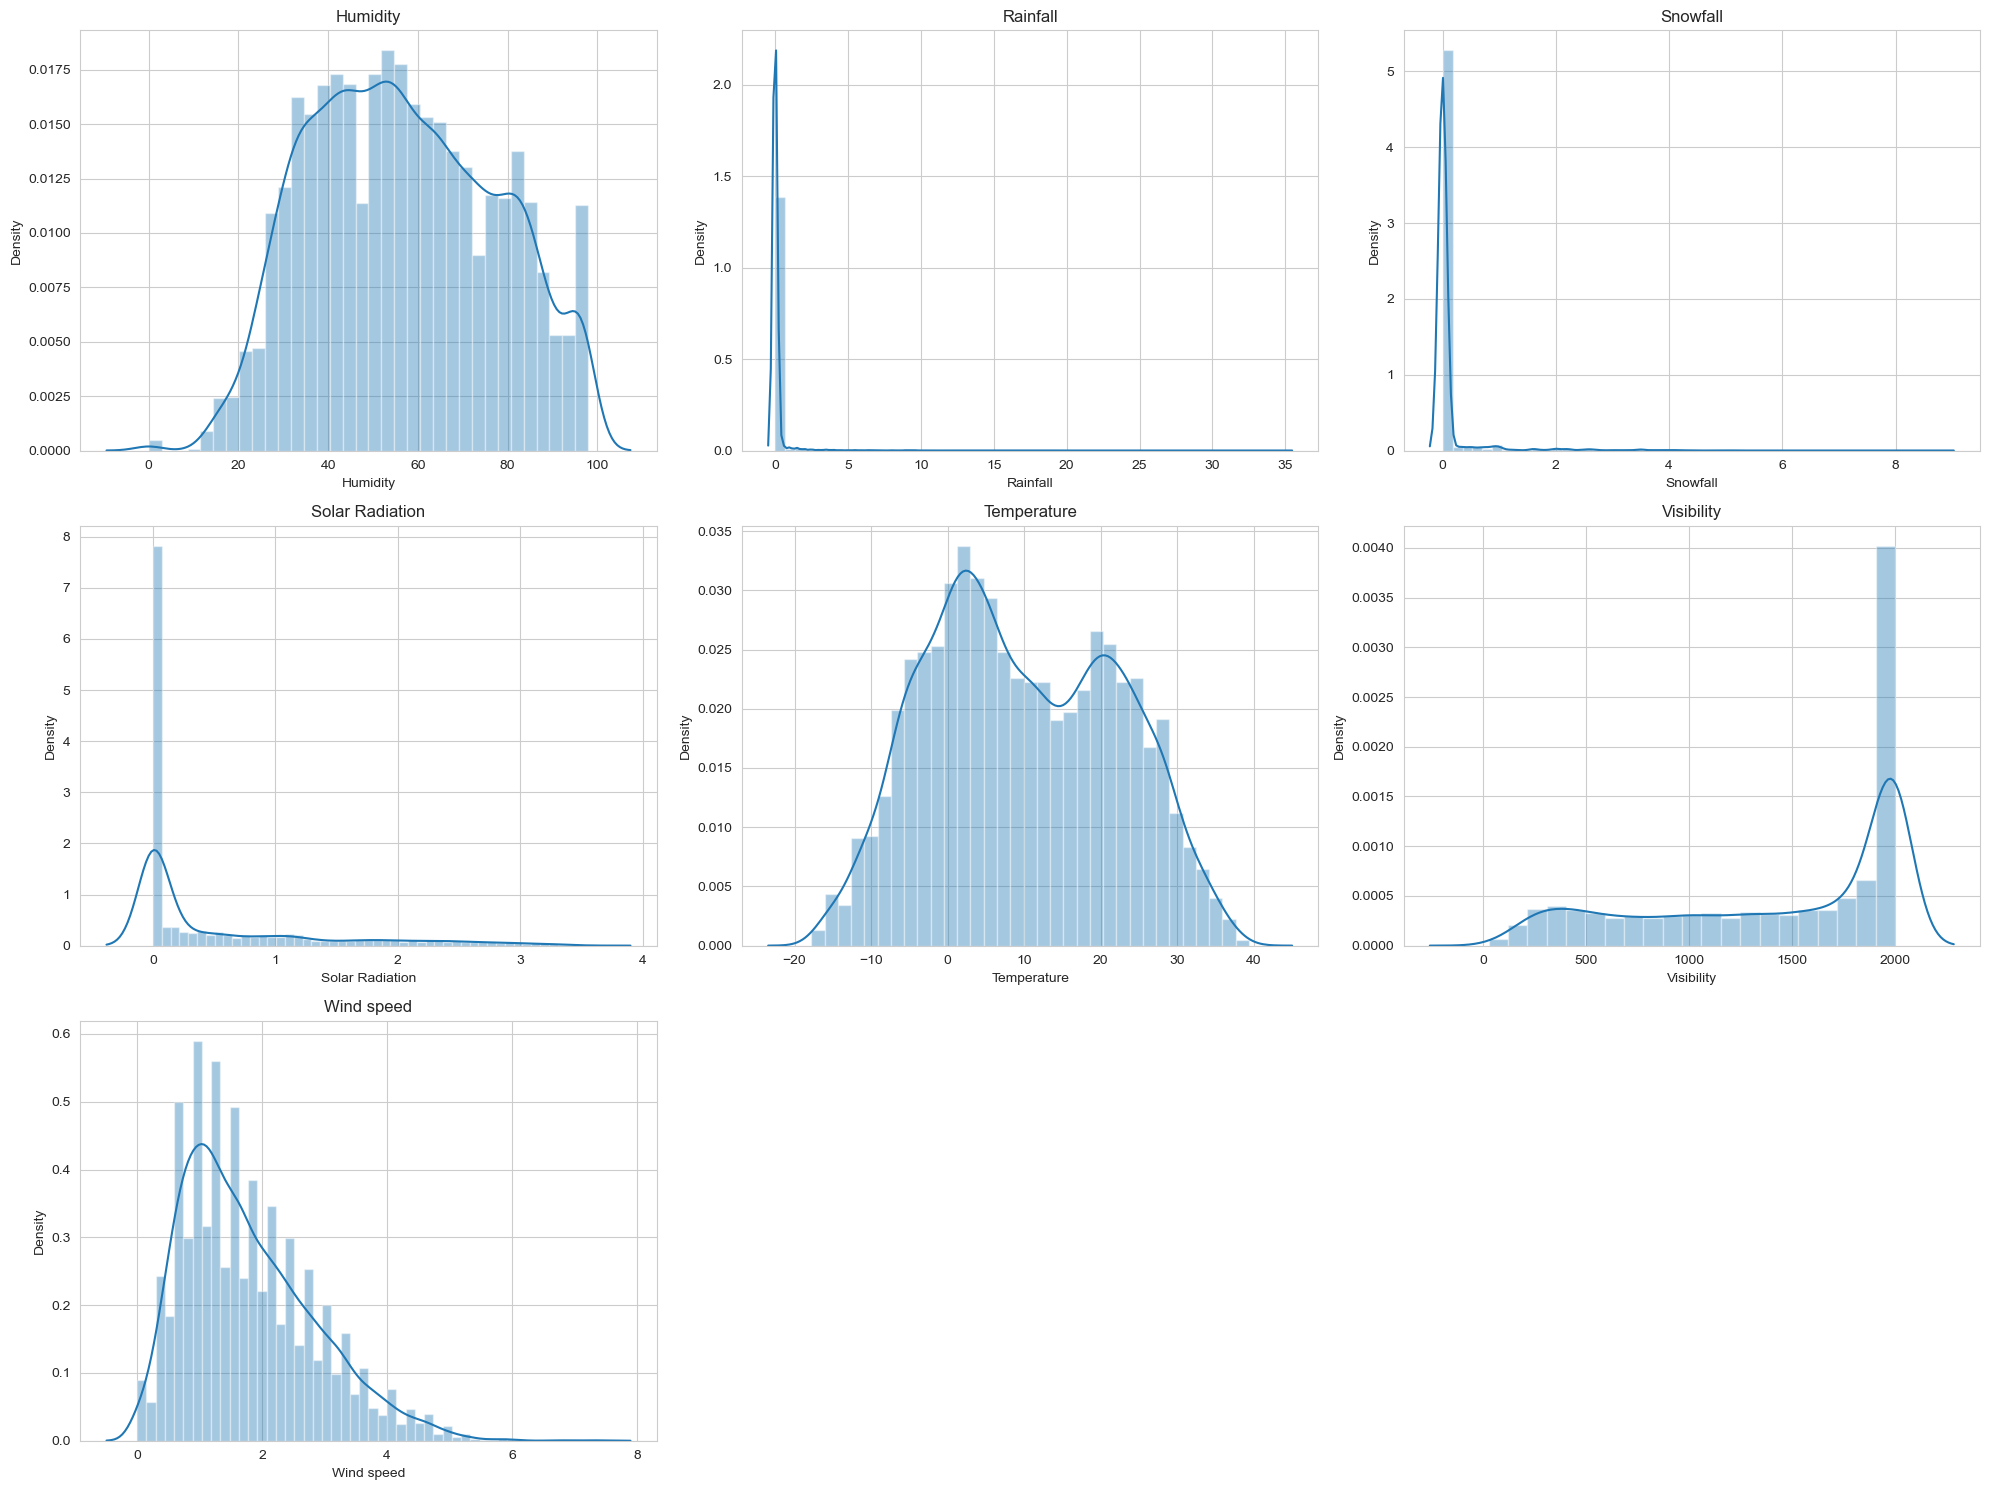

In [114]:
# Distribution of weather variables

numerical_data = train_data[["Humidity", "Rainfall", "Snowfall",
    "Solar Radiation", "Temperature", "Visibility", "Wind speed"]]

n=1
plt.figure(figsize=(20,15))
for i in numerical_data.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(data[i])
  plt.title(i)
  plt.tight_layout()

(0.0, 2000.0)

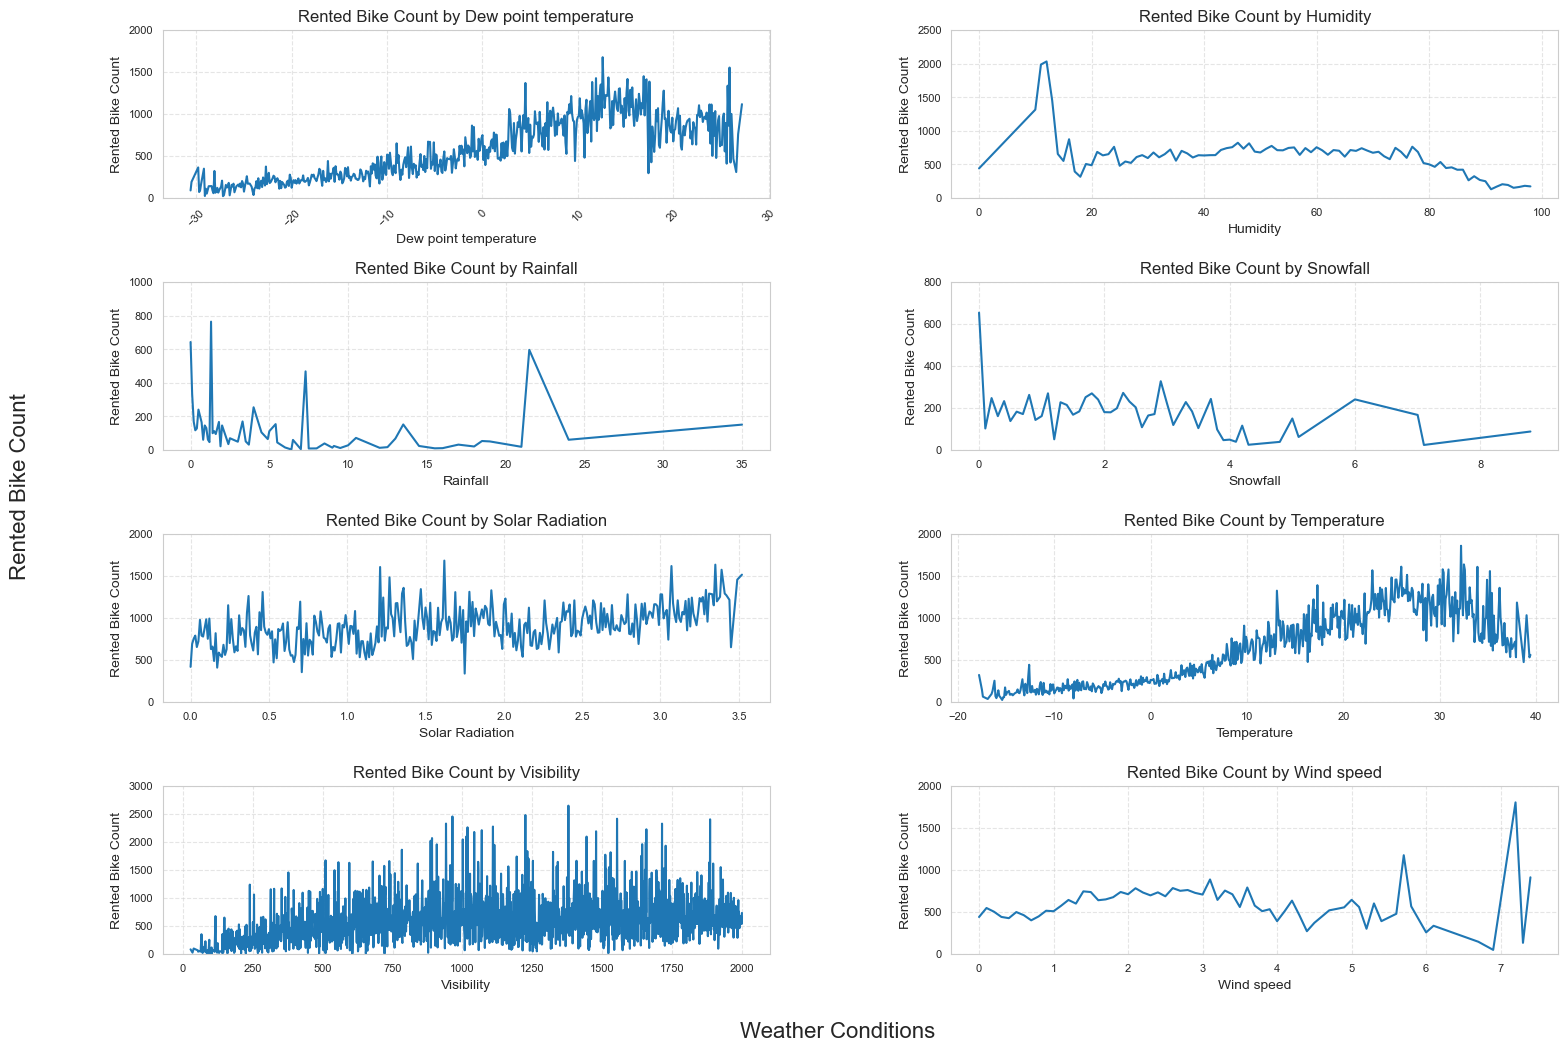

In [115]:
# Relationship between weather variables and the target variable

fig, ax = plt.subplots(4,2, figsize=(18,12)) 

fig.text(0.5, 0.04, 'Weather Conditions', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Rented Bike Count', va='center', rotation='vertical', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

sns.lineplot(data=train_data, x = 'Dew point temperature', y ='Rented Bike Count',palette='pastel', ax=ax[0,0],ci=None)
ax[0,0].set_title('Rented Bike Count by Dew point temperature', fontsize=12)
ax[0,0].set_ylabel('Rented Bike Count',size=10) 
ax[0,0].set_xlabel('Dew point temperature', fontsize=10)
ax[0,0].tick_params(axis='x', labelsize=8, rotation=45)  
ax[0,0].tick_params(axis='y', labelsize=8) 
ax[0,0].grid(True, linestyle='--', alpha=0.5)
ax[0,0].set_ylim(0, 2000)


sns.lineplot(data=train_data, x = 'Humidity', y ='Rented Bike Count',palette='pastel', ax=ax[0,1],ci=None)
ax[0,1].set_title('Rented Bike Count by Humidity',fontsize=12)
ax[0,1].set_ylabel('Rented Bike Count',size=10) 
ax[0,1].set_xlabel('Humidity', fontsize=10)
ax[0,1].tick_params(labelsize=8)
ax[0,1].tick_params(labelsize=8)
ax[0,1].grid(True, linestyle='--', alpha=0.5)
ax[0,1].set_ylim(0, 2500)


sns.lineplot(data=train_data, x = 'Rainfall', y ='Rented Bike Count',palette='pastel', ax=ax[1,0],ci=None)
ax[1,0].set_title('Rented Bike Count by Rainfall',fontsize=12)
ax[1,0].set_ylabel('Rented Bike Count',size=10) 
ax[1,0].set_xlabel('Rainfall', size=10)
ax[1,0].tick_params(labelsize=8)
ax[1,0].tick_params(labelsize=8)
ax[1,0].grid(True, linestyle='--', alpha=0.5)
ax[1,0].set_ylim(0, 1000)



sns.lineplot(data=train_data, x = 'Snowfall', y ='Rented Bike Count',palette='pastel', ax=ax[1,1],ci=None)
ax[1,1].set_title('Rented Bike Count by Snowfall',fontsize=12)
ax[1,1].set_ylabel('Rented Bike Count',size=10) 
ax[1,1].set_xlabel('Snowfall', size=10)
ax[1,1].tick_params(labelsize=8)
ax[1,1].tick_params(labelsize=8)
ax[1,1].grid(True, linestyle='--', alpha=0.5)
ax[1,1].set_ylim(0, 800)

sns.lineplot(data=train_data, x = 'Solar Radiation', y ='Rented Bike Count',palette='pastel', ax=ax[2,0],ci=None)
ax[2,0].set_title('Rented Bike Count by Solar Radiation',fontsize=12)
ax[2,0].set_ylabel('Rented Bike Count',size=10) 
ax[2,0].set_xlabel('Solar Radiation', size=10)
ax[2,0].tick_params(labelsize=8)
ax[2,0].tick_params(labelsize=8)
ax[2,0].grid(True, linestyle='--', alpha=0.5)
ax[2,0].set_ylim(0, 2000)

sns.lineplot(data=train_data, x = 'Temperature', y ='Rented Bike Count',palette='pastel', ax=ax[2,1],ci=None)
ax[2,1].set_title('Rented Bike Count by Temperature',fontsize=12)
ax[2,1].set_ylabel('Rented Bike Count',size=10) 
ax[2,1].set_xlabel('Temperature', size=10)
ax[2,1].tick_params(labelsize=8)
ax[2,1].tick_params(labelsize=8)
ax[2,1].grid(True, linestyle='--', alpha=0.5)
ax[2,1].set_ylim(0, 2000)


sns.lineplot(data=train_data, x = 'Visibility', y ='Rented Bike Count',palette='pastel', ax=ax[3,0],ci=None)
ax[3,0].set_title('Rented Bike Count by Visibility',fontsize=12)
ax[3,0].set_ylabel('Rented Bike Count',size=10) 
ax[3,0].set_xlabel('Visibility', size=10)
ax[3,0].tick_params(labelsize=8)
ax[3,0].tick_params(labelsize=8)
ax[3,0].grid(True, linestyle='--', alpha=0.5)
ax[3,0].set_ylim(0, 3000)


sns.lineplot(data=train_data, x = 'Wind speed', y ='Rented Bike Count',palette='pastel', ax=ax[3,1],ci=None)
ax[3,1].set_title('Rented Bike Count by Wind speed',fontsize=12)
ax[3,1].set_ylabel('Rented Bike Count',size=10) 
ax[3,1].set_xlabel('Wind speed', size=10)
ax[3,1].tick_params(labelsize=8)
ax[3,1].tick_params(labelsize=8)
ax[3,1].grid(True, linestyle='--', alpha=0.5)
ax[3,1].set_ylim(0, 2000)


- **Dew Point Temperature:** As the dew point temperature increases, bike rentals tend to increase steadily.

- **Humidity:** Bike rentals are highest at lower humidity levels (around 20%) and decline as humidity increases.

- **Rainfall:** Rainfall seems to have mostly a negative effect on bike rentals. 

- **Snowfall:** Snowfall significantly reduces bike rentals, with very low counts observed even at minimal snowfall levels.

- **Solar Radiation:** Bike rentals show a mild positive correlation with increased solar radiation.

- **Temperature:** Rentals increase with temperature, peaking around 30°C, after which they appear to level off, suggesting that weather encourages cycling, but after reaching a certain point it has a strong negative effect on bike rentals. 

- **Visibility:** Higher visibility correlates positively with bike rentals.

- **Wind Speed:** Bike rentals remain fairly stable with low wind speeds, show drops but also peaks at higher wind speeds.


further actions:

- Applying transformations to skewed variables 

#### Applying logarithmic transformation to Wind speed, Snowfall, Solar Radiation and Rainfall

We apply Log transformation to skewed continuous variables to reduce skewness, stabilize variance, and make the data more normally distributed. This can help improve the performance and interpretability of the models.

In [116]:
temp_log = np.log1p(train_data['Temperature'] + 0.01)

In [117]:
train_data['Log_Wind_speed'] = np.log1p(train_data['Wind speed'] + 0.01)
train_data['Log_Snowfall'] = np.log1p(train_data['Snowfall'] + 0.01)
train_data['Log_Solar_Radiation'] = np.log1p(train_data['Solar Radiation'] + 0.01)
train_data['Log_Rainfall'] = np.log1p(train_data['Rainfall'] + 0.01)

test_functioning_yes['Log_Wind_speed'] = np.log1p(test_functioning_yes['Wind speed'] + 0.01)
test_functioning_yes['Log_Snowfall'] = np.log1p(test_functioning_yes['Snowfall'] + 0.01)
test_functioning_yes['Log_Solar_Radiation'] = np.log1p(test_functioning_yes['Solar Radiation'] + 0.01)
test_functioning_yes['Log_Rainfall'] = np.log1p(test_functioning_yes['Rainfall'] + 0.01)

(0.0, 1000.0)

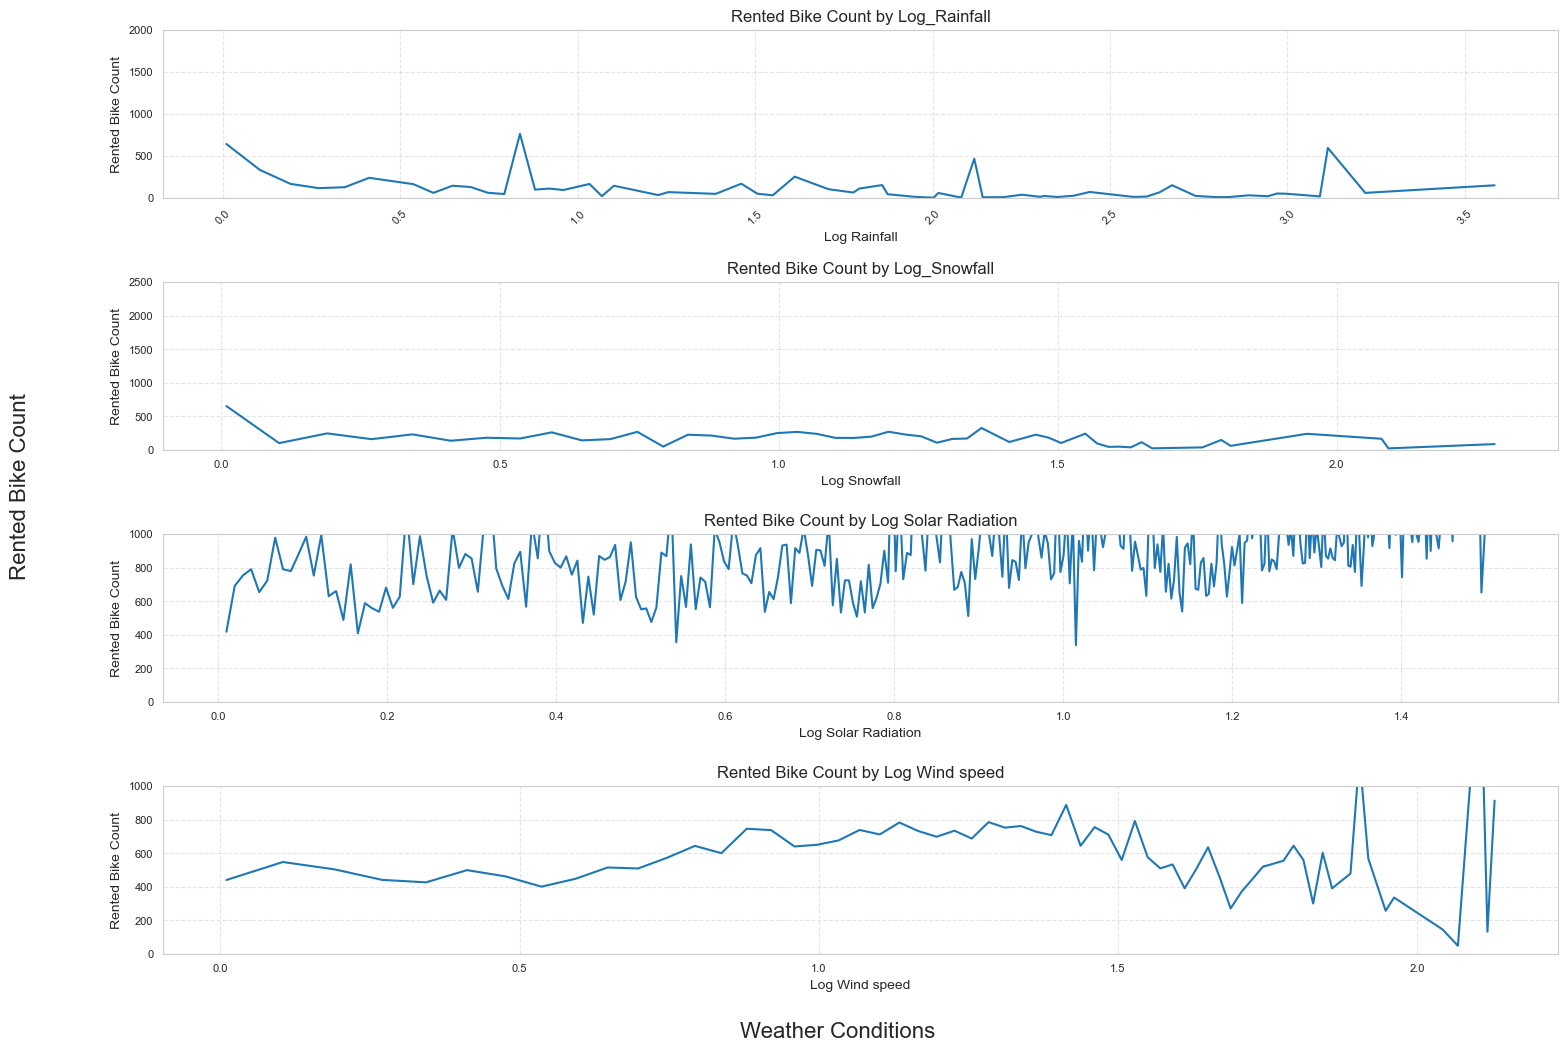

In [118]:
fig, ax = plt.subplots(4,1, figsize=(18,12)) 

fig.text(0.5, 0.04, 'Weather Conditions', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Rented Bike Count', va='center', rotation='vertical', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

sns.lineplot(data=train_data, x = 'Log_Rainfall', y ='Rented Bike Count',palette='pastel', ax=ax[0],ci=None)
ax[0].set_title('Rented Bike Count by Log_Rainfall', fontsize=12)
ax[0].set_ylabel('Rented Bike Count',size=10) 
ax[0].set_xlabel('Log Rainfall', fontsize=10)
ax[0].tick_params(axis='x', labelsize=8, rotation=45)  
ax[0].tick_params(axis='y', labelsize=8) 
ax[0].grid(True, linestyle='--', alpha=0.5)
ax[0].set_ylim(0, 2000)


sns.lineplot(data=train_data, x = 'Log_Snowfall', y ='Rented Bike Count',palette='pastel', ax=ax[1],ci=None)
ax[1].set_title('Rented Bike Count by Log_Snowfall',fontsize=12)
ax[1].set_ylabel('Rented Bike Count',size=10) 
ax[1].set_xlabel('Log Snowfall', fontsize=10)
ax[1].tick_params(labelsize=8)
ax[1].tick_params(labelsize=8)
ax[1].grid(True, linestyle='--', alpha=0.5)
ax[1].set_ylim(0, 2500)


sns.lineplot(data=train_data, x = 'Log_Solar_Radiation', y ='Rented Bike Count',palette='pastel', ax=ax[2],ci=None)
ax[2].set_title('Rented Bike Count by Log Solar Radiation',fontsize=12)
ax[2].set_ylabel('Rented Bike Count',size=10) 
ax[2].set_xlabel('Log Solar Radiation', size=10)
ax[2].tick_params(labelsize=8)
ax[2].tick_params(labelsize=8)
ax[2].grid(True, linestyle='--', alpha=0.5)
ax[2].set_ylim(0, 1000)



sns.lineplot(data=train_data, x = 'Log_Wind_speed', y ='Rented Bike Count',palette='pastel', ax=ax[3],ci=None)
ax[3].set_title('Rented Bike Count by Log Wind speed',fontsize=12)
ax[3].set_ylabel('Rented Bike Count',size=10) 
ax[3].set_xlabel('Log Wind speed', size=10)
ax[3].tick_params(labelsize=8)
ax[3].tick_params(labelsize=8)
ax[3].grid(True, linestyle='--', alpha=0.5)
ax[3].set_ylim(0, 1000)

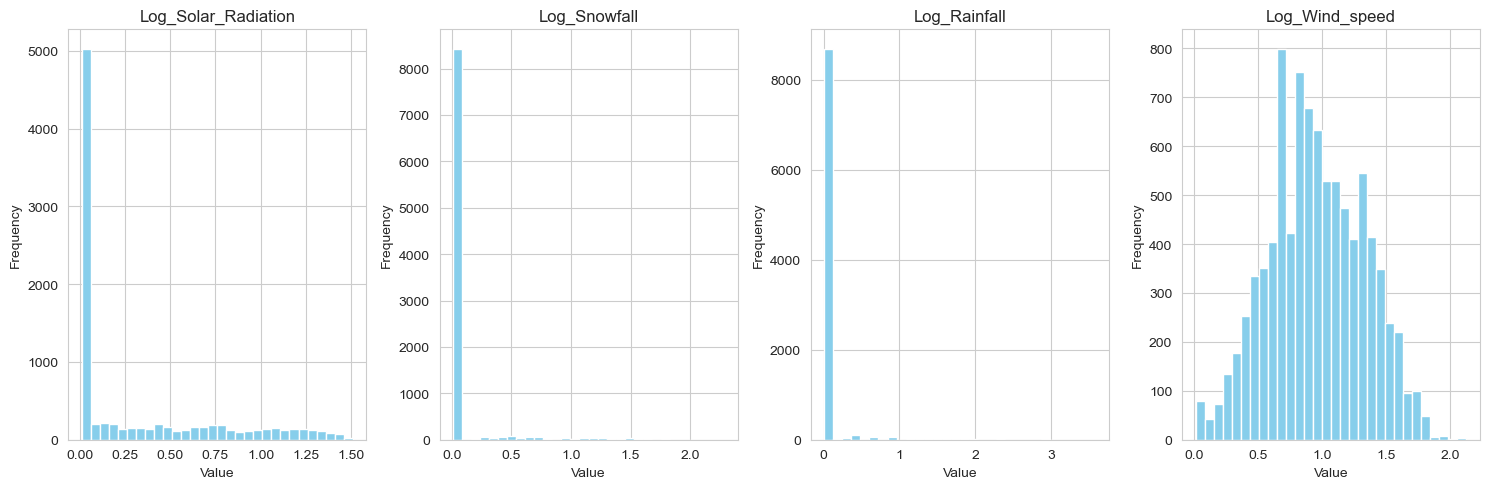

In [119]:
columns_to_plot = ["Log_Solar_Radiation", "Log_Snowfall", "Log_Rainfall",'Log_Wind_speed']
train_data[columns_to_plot].hist(bins=30, figsize=(15, 5), layout=(1, 4),color='skyblue')

for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 4, i + 1)
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

The log transformation has partially reduced the skewness of the data; however, Log_Solar_Radiation, Log_Snowfall, and Log_Rainfall still exhibit significant skewness.  In contrast, Log_Wind_speed shows a more balanced and approximately normal distribution, making it suitable for inclusion in the model without further modifications.

An alternative approach for Solar_Radiation, Snowfall, and Rainfall could involve converting these variables into binary indicators (e.g., zero vs. non-zero values). This might be appropriate if their zero or near-zero values reflect meaningful distinctions in the data - which is not the case here, therefore it is preferable to explore continuous transformations. For now we decide to use the log transformations of these variables.

In [120]:
train_data.drop(columns=['Rainfall','Snowfall','Solar Radiation','Wind speed'],inplace=True)

### feat01-feat10 

(0.0, 1.0, 0.0, 1.0)

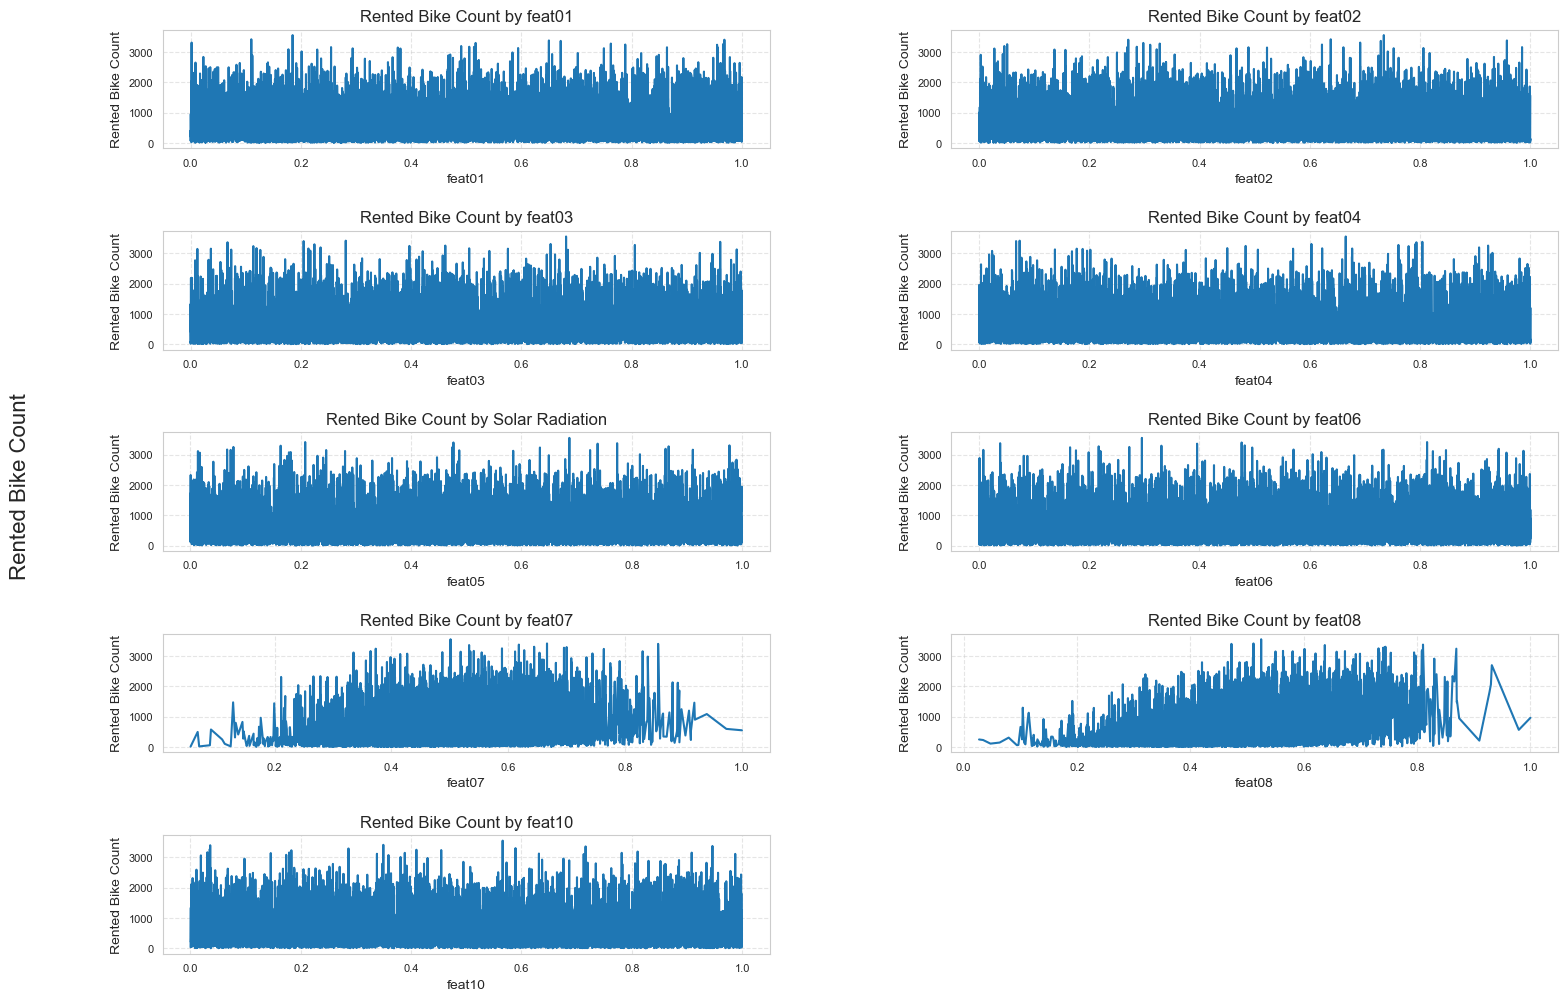

In [121]:
fig, ax = plt.subplots(5,2, figsize=(18,12)) 

fig.text(0.04, 0.5, 'Rented Bike Count', va='center', rotation='vertical', fontsize=16)
fig.subplots_adjust(hspace=0.7, wspace=0.3)

sns.lineplot(data=train_data, x = 'feat01', y ='Rented Bike Count',palette='pastel', ax=ax[0,0],ci=None)
ax[0,0].set_title('Rented Bike Count by feat01', fontsize=12)
ax[0,0].set_ylabel('Rented Bike Count',size=10) 
ax[0,0].set_xlabel('feat01', fontsize=10)
ax[0,0].tick_params(axis='x', labelsize=8)  
ax[0,0].tick_params(axis='y', labelsize=8) 
ax[0,0].grid(True, linestyle='--', alpha=0.5)


sns.lineplot(data=train_data, x = 'feat02', y ='Rented Bike Count',palette='pastel', ax=ax[0,1],ci=None)
ax[0,1].set_title('Rented Bike Count by feat02',fontsize=12)
ax[0,1].set_ylabel('Rented Bike Count',size=10) 
ax[0,1].set_xlabel('feat02', fontsize=10)
ax[0,1].tick_params(labelsize=8)
ax[0,1].tick_params(labelsize=8)
ax[0,1].grid(True, linestyle='--', alpha=0.5)


sns.lineplot(data=train_data, x = 'feat03', y ='Rented Bike Count',palette='pastel', ax=ax[1,0],ci=None)
ax[1,0].set_title('Rented Bike Count by feat03',fontsize=12)
ax[1,0].set_ylabel('Rented Bike Count',size=10) 
ax[1,0].set_xlabel('feat03', size=10)
ax[1,0].tick_params(labelsize=8)
ax[1,0].tick_params(labelsize=8)
ax[1,0].grid(True, linestyle='--', alpha=0.5)



sns.lineplot(data=train_data, x = 'feat04', y ='Rented Bike Count',palette='pastel', ax=ax[1,1],ci=None)
ax[1,1].set_title('Rented Bike Count by feat04',fontsize=12)
ax[1,1].set_ylabel('Rented Bike Count',size=10) 
ax[1,1].set_xlabel('feat04', size=10)
ax[1,1].tick_params(labelsize=8)
ax[1,1].tick_params(labelsize=8)
ax[1,1].grid(True, linestyle='--', alpha=0.5)

sns.lineplot(data=train_data, x = 'feat05', y ='Rented Bike Count',palette='pastel', ax=ax[2,0],ci=None)
ax[2,0].set_title('Rented Bike Count by Solar Radiation',fontsize=12)
ax[2,0].set_ylabel('Rented Bike Count',size=10) 
ax[2,0].set_xlabel('feat05', size=10)
ax[2,0].tick_params(labelsize=8)
ax[2,0].tick_params(labelsize=8)
ax[2,0].grid(True, linestyle='--', alpha=0.5)

sns.lineplot(data=train_data, x = 'feat06', y ='Rented Bike Count',palette='pastel', ax=ax[2,1],ci=None)
ax[2,1].set_title('Rented Bike Count by feat06',fontsize=12)
ax[2,1].set_ylabel('Rented Bike Count',size=10) 
ax[2,1].set_xlabel('feat06', size=10)
ax[2,1].tick_params(labelsize=8)
ax[2,1].tick_params(labelsize=8)
ax[2,1].grid(True, linestyle='--', alpha=0.5)


sns.lineplot(data=train_data, x = 'feat07', y ='Rented Bike Count',palette='pastel', ax=ax[3,0],ci=None)
ax[3,0].set_title('Rented Bike Count by feat07',fontsize=12)
ax[3,0].set_ylabel('Rented Bike Count',size=10) 
ax[3,0].set_xlabel('feat07', size=10)
ax[3,0].tick_params(labelsize=8)
ax[3,0].tick_params(labelsize=8)
ax[3,0].grid(True, linestyle='--', alpha=0.5)


sns.lineplot(data=train_data, x = 'feat08', y ='Rented Bike Count',palette='pastel', ax=ax[3,1],ci=None)
ax[3,1].set_title('Rented Bike Count by feat08',fontsize=12)
ax[3,1].set_ylabel('Rented Bike Count',size=10) 
ax[3,1].set_xlabel('feat08', size=10)
ax[3,1].tick_params(labelsize=8)
ax[3,1].tick_params(labelsize=8)
ax[3,1].grid(True, linestyle='--', alpha=0.5)



sns.lineplot(data=train_data, x = 'feat10', y ='Rented Bike Count',palette='pastel', ax=ax[4,0],ci=None)
ax[4,0].set_title('Rented Bike Count by feat10',fontsize=12)
ax[4,0].set_ylabel('Rented Bike Count',size=10) 
ax[4,0].set_xlabel('feat10', size=10)
ax[4,0].tick_params(labelsize=8)
ax[4,0].tick_params(labelsize=8)
ax[4,0].grid(True, linestyle='--', alpha=0.5)

ax[4,1].axis('off')


This plots are not very informative. We need to further investigate to discover the possible meaning and usefulness of these variables. For now most of them look like random numbers generated from 0 to 1.

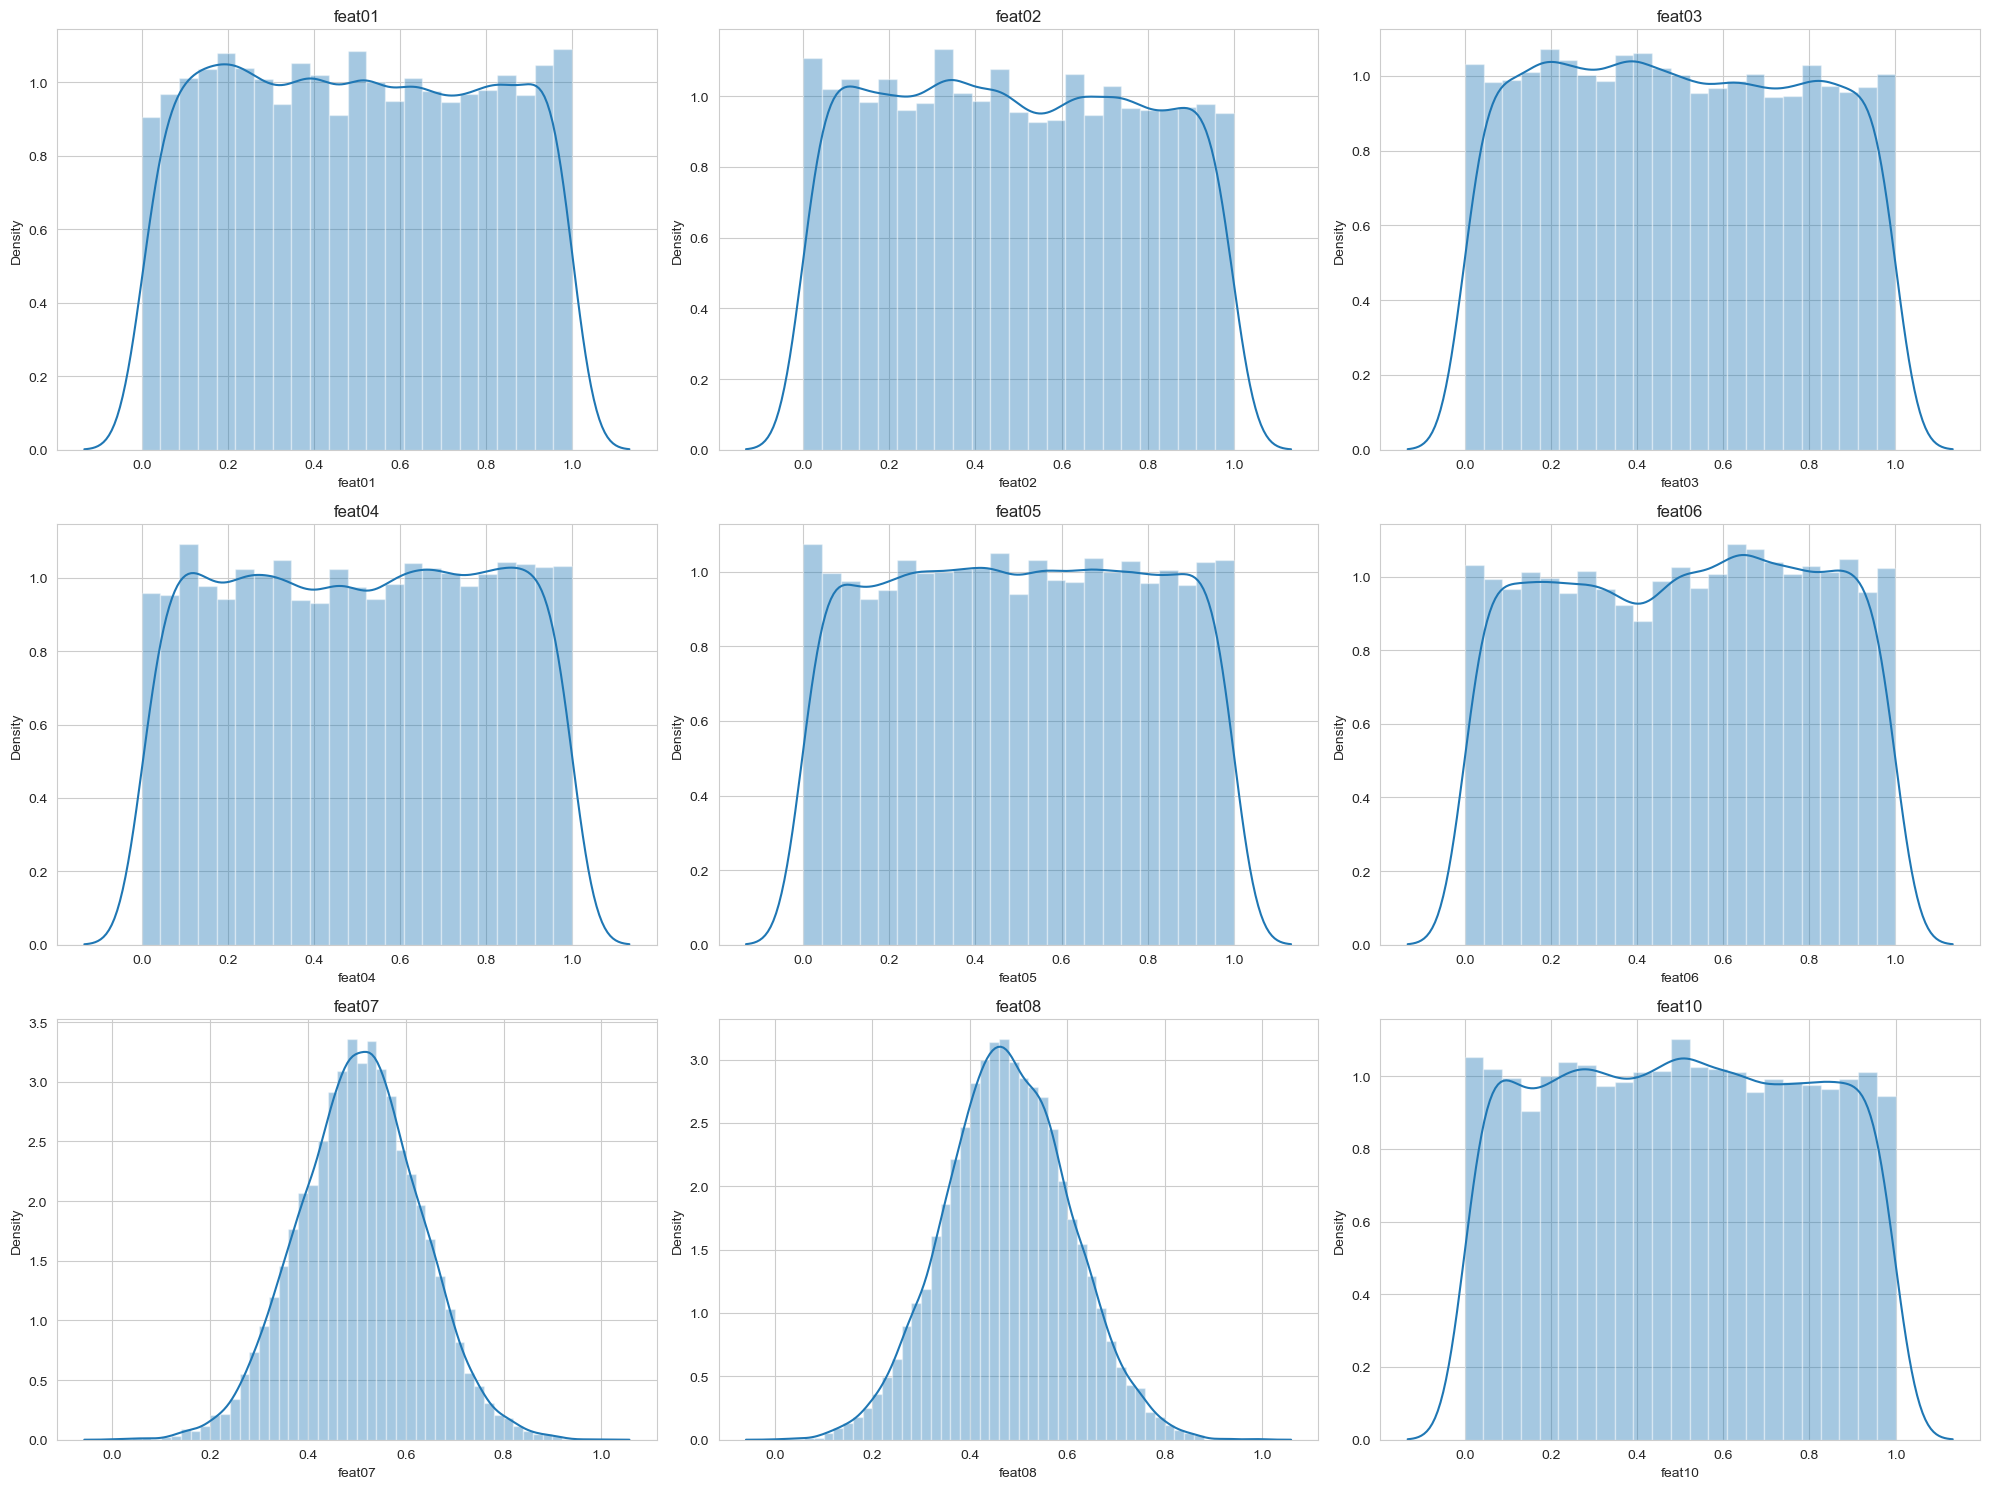

In [122]:
feats = train_data[['feat01','feat02','feat03','feat04','feat05','feat06','feat07','feat08','feat10']]

n=1
plt.figure(figsize=(20,15))
for i in feats.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(data[i])
  plt.title(i)
  plt.tight_layout()

feat07 and feat08 are very close to normal distribution. The rest of the feat variables display a fairly uniform distribution.

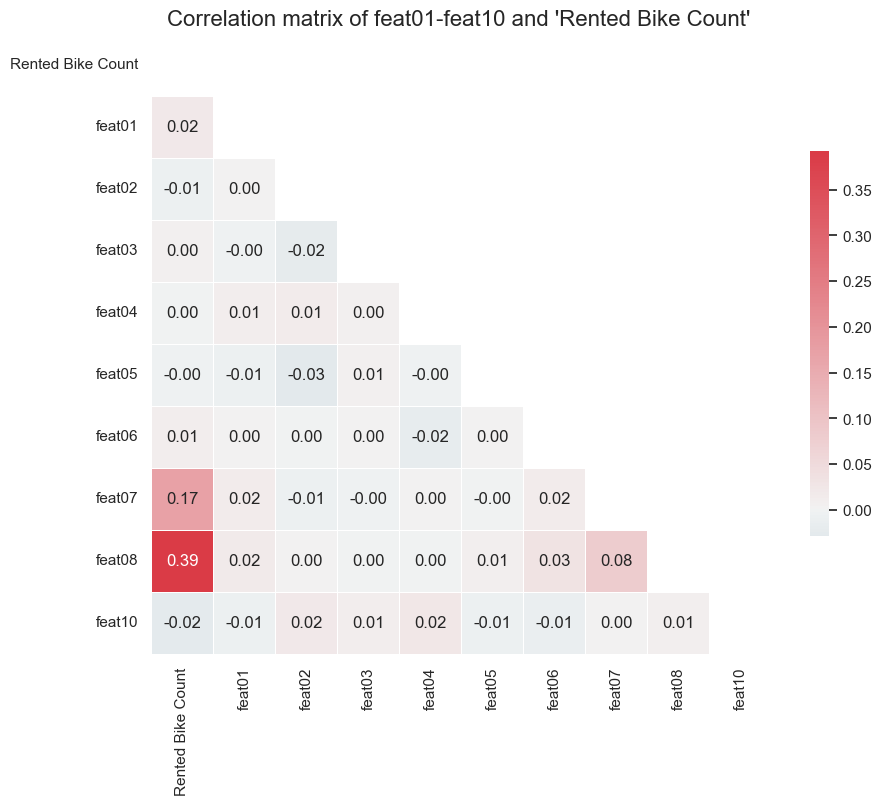

In [123]:
corr_feats = train_data[['Rented Bike Count','feat01','feat02','feat03','feat04','feat05','feat06','feat07','feat08','feat10']].corr()

sns.set_theme(style="white")

mask = np.triu(np.ones_like(corr_feats, dtype=bool))
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)  

sns.heatmap(corr_feats, center=0,mask=mask,cmap=cmap,annot=True,fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation matrix of feat01-feat10 and 'Rented Bike Count' ",size=16)
plt.show()

The correlation matrix seems to confirm our previous assumptions that most of these features may not be useful for prediction. For now we leave feat07 and feat08 in the daset as they are the most correlated with our target variable. The rest of the feat variables are removed from the dataset. 

In [124]:
features = [f'feat{i:02d}' for i in range (1,11)]
for feat in features:
    if feat in data.columns:
        if feat not in ['feat07','feat08']:
            train_data.drop(columns=feat, inplace=True)

for feat in features:
    if feat in data.columns:
        if feat not in ['feat07','feat08']:
            test_functioning_yes.drop(columns=feat, inplace=True)

In [125]:
train_data.columns

Index(['Dew point temperature', 'feat07', 'feat08', 'Holiday', 'Humidity',
       'Rented Bike Count', 'Temperature', 'Visibility', 'Year',
       'Hour_Group_Cluster', 'Month_Group_Cluster', 'Weekend',
       'Hour_Holiday_0_0', 'Hour_Holiday_0_1', 'Hour_Holiday_1_0',
       'Hour_Holiday_1_1', 'Hour_Holiday_2_0', 'Hour_Holiday_2_1',
       'Hour_Holiday_3_0', 'Hour_Holiday_3_1', 'Hour_Weekend_0_0',
       'Hour_Weekend_0_1', 'Hour_Weekend_1_0', 'Hour_Weekend_1_1',
       'Hour_Weekend_2_0', 'Hour_Weekend_2_1', 'Hour_Weekend_3_0',
       'Hour_Weekend_3_1', 'Log_Wind_speed', 'Log_Snowfall',
       'Log_Solar_Radiation', 'Log_Rainfall'],
      dtype='object')

#### Correlation Matrix of Numerical Variables

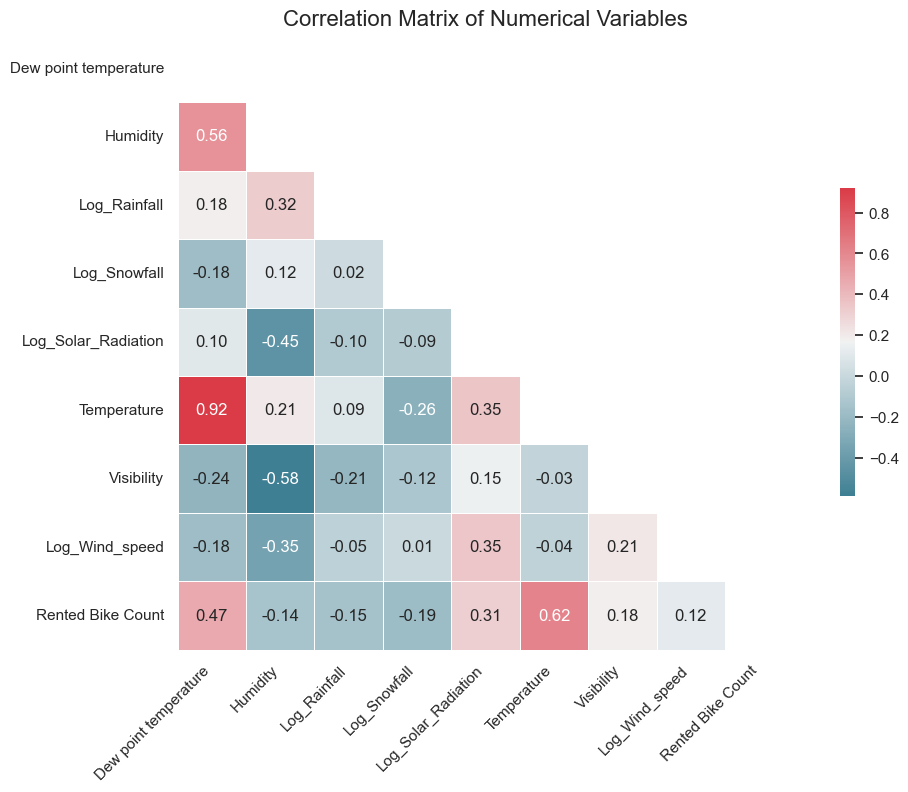

In [126]:
corrdata = train_data[["Dew point temperature", "Humidity", "Log_Rainfall", "Log_Snowfall",
"Log_Solar_Radiation", "Temperature", "Visibility", "Log_Wind_speed", "Rented Bike Count"
]]

corr_matrix = corrdata.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8)) 
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    corr_matrix,mask=mask,cmap=cmap, annot=True, fmt=".2f", square=True,linewidths=0.5,cbar_kws={"shrink": 0.5})

plt.title("Correlation Matrix of Numerical Variables", fontsize=16)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0) 
plt.show()

- Temperature and Dew point temperature and very correlated, however temperature is more correlated with Rented Bike Count so we leave it in the dataset and remove Dew point temperature
- Temperature and Log_Solar_Radiation are two mostly correlated variables with the target variable, therefore they will most likely be strong predictors

- Humidity, Rainfall, Snowfall, Visibility and Wind Speed are weakly correlated with our target variable, therefore we assess that they will not be very useful for our prediction

In [127]:
# removing Dew point temperature the dataset to avoid multicollinearity 
train_data.drop(columns=['Dew point temperature'],inplace=True)
test_functioning_yes.drop(columns=['Dew point temperature'],inplace=True)

In [128]:
# Recoding remaining categorical variables to dummies 
dummies = pd.get_dummies(train_data[['Hour_Group_Cluster', 'Month_Group_Cluster', 'Year']], drop_first=True)
train_data_encoded = pd.concat([train_data.drop(['Hour_Group_Cluster', 'Month_Group_Cluster', 'Year'], axis=1), dummies], axis=1)

dummies_test = pd.get_dummies(test_functioning_yes[['Hour_Group_Cluster', 'Month_Group_Cluster', 'Year']], drop_first=True)
test_data_encoded = pd.concat([test_functioning_yes.drop(['Hour_Group_Cluster', 'Month_Group_Cluster', 'Year'], axis=1), dummies_test], axis=1)

In [129]:
# making sure dummies are encoded as 0-1 and not True/False
train_data_encoded = train_data_encoded.astype(int)
test_data_encoded = test_data_encoded.astype(int)

In [130]:
train_data_encoded.head()

,feat07,feat08,Holiday,Humidity,Rented Bike Count,Temperature,Visibility,Weekend,Hour_Holiday_0_0,Hour_Holiday_0_1,Hour_Holiday_1_0,Hour_Holiday_1_1,Hour_Holiday_2_0,Hour_Holiday_2_1,Hour_Holiday_3_0,Hour_Holiday_3_1,Hour_Weekend_0_0,Hour_Weekend_0_1,Hour_Weekend_1_0,Hour_Weekend_1_1,Hour_Weekend_2_0,Hour_Weekend_2_1,Hour_Weekend_3_0,Hour_Weekend_3_1,Log_Wind_speed,Log_Snowfall,Log_Solar_Radiation,Log_Rainfall,Hour_Group_Cluster_1,Hour_Group_Cluster_2,Hour_Group_Cluster_3,Month_Group_Cluster_1,Month_Group_Cluster_2,Month_Group_Cluster_3,Year_2018
6493,0,0,0,76,115,0,421,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
11403,0,0,0,49,105,-13,2000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3979,0,0,0,27,1877,28,2000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
3734,0,0,0,34,265,1,1394,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
7058,0,0,1,84,25,-1,425,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [131]:
test_data_encoded.head()

,feat07,feat08,Holiday,Humidity,Rainfall,Rented Bike Count,Snowfall,Solar Radiation,Temperature,Visibility,Wind speed,Weekend,Hour_Holiday_0_0,Hour_Holiday_0_1,Hour_Holiday_1_0,Hour_Holiday_1_1,Hour_Holiday_2_0,Hour_Holiday_2_1,Hour_Holiday_3_0,Hour_Holiday_3_1,Hour_Weekend_0_0,Hour_Weekend_0_1,Hour_Weekend_1_0,Hour_Weekend_1_1,Hour_Weekend_2_0,Hour_Weekend_2_1,Hour_Weekend_3_0,Hour_Weekend_3_1,Log_Wind_speed,Log_Snowfall,Log_Solar_Radiation,Log_Rainfall,Hour_Group_Cluster_1,Hour_Group_Cluster_2,Hour_Group_Cluster_3,Month_Group_Cluster_1,Month_Group_Cluster_2,Month_Group_Cluster_3,Year_2018
4112,0,0,1,33,0,48,0,0,-4,1923,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4250,0,0,0,85,0,788,0,0,6,536,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1829,0,0,0,54,0,34,0,0,-12,1790,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
5354,0,0,1,45,0,231,0,0,-1,1375,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1
10108,0,0,0,40,0,295,0,1,3,1950,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1


#### ANOVA F-test for selection of the categorical features

In [132]:
# Selecting categorical features
categorical_features = ['Holiday','Year_2018', 'Weekend',
       'Hour_Holiday_0_0', 'Hour_Holiday_0_1', 'Hour_Holiday_1_0',
       'Hour_Holiday_1_1', 'Hour_Holiday_2_0', 'Hour_Holiday_2_1',
       'Hour_Holiday_3_0', 'Hour_Holiday_3_1', 'Hour_Weekend_0_0',
       'Hour_Weekend_0_1', 'Hour_Weekend_1_0', 'Hour_Weekend_1_1',
       'Hour_Weekend_2_0', 'Hour_Weekend_2_1', 'Hour_Weekend_3_0','Hour_Weekend_3_1',
       'Hour_Group_Cluster_3','Month_Group_Cluster_3', 'Month_Group_Cluster_1',
       'Hour_Group_Cluster_1', 'Hour_Group_Cluster_2', 'Month_Group_Cluster_2']

X_cat = train_data_encoded[categorical_features]

# ANOVA F-test for categorical features
anova_selector = SelectKBest(score_func=f_classif, k='all').fit(X_cat, y_train)
anova_scores = pd.DataFrame({
    'Feature': X_cat.columns,
    'ANOVA F Score': anova_selector.scores_
}).sort_values(by='ANOVA F Score', ascending=False)

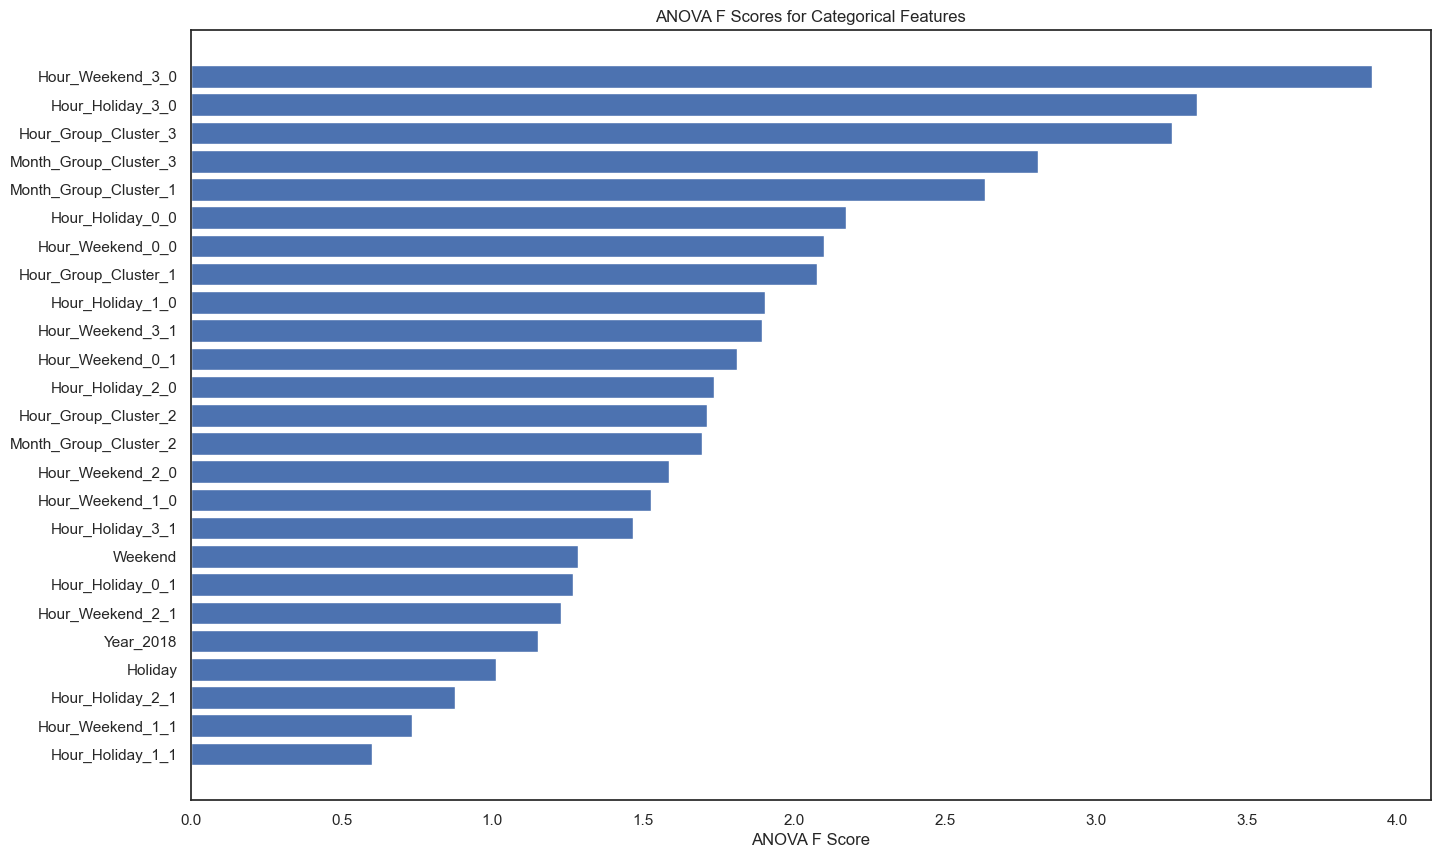

In [133]:
# Plotting the ANOVA F Scores
plt.figure(figsize=(16, 10))
plt.barh(anova_scores['Feature'], anova_scores['ANOVA F Score'], align='center')
plt.xlabel('ANOVA F Score')
plt.title('ANOVA F Scores for Categorical Features')
plt.gca().invert_yaxis()
plt.show()

In [134]:
f_values = anova_selector.scores_
p_values = anova_selector.pvalues_

anova_results = pd.DataFrame({
    'Feature': X_cat.columns,
    'ANOVA F Score': f_values,
    'p-value': p_values
}).sort_values(by='ANOVA F Score', ascending=False)
print(anova_results)

                  Feature  ANOVA F Score        p-value
17       Hour_Weekend_3_0       3.914684   0.000000e+00
9        Hour_Holiday_3_0       3.334109  5.612478e-301
19   Hour_Group_Cluster_3       3.253085  3.711112e-288
20  Month_Group_Cluster_3       2.807557  1.230153e-217
21  Month_Group_Cluster_1       2.634424  1.898269e-190
3        Hour_Holiday_0_0       2.170838  9.481477e-120
11       Hour_Weekend_0_0       2.100512  1.749033e-109
22   Hour_Group_Cluster_1       2.076611  4.923882e-106
5        Hour_Holiday_1_0       1.902570   1.220455e-81
18       Hour_Weekend_3_1       1.893483   2.090126e-80
12       Hour_Weekend_0_1       1.810718   2.193774e-69
7        Hour_Holiday_2_0       1.733938   1.505528e-59
23   Hour_Group_Cluster_2       1.712063   8.009346e-57
24  Month_Group_Cluster_2       1.696503   6.613238e-55
15       Hour_Weekend_2_0       1.585176   8.755157e-42
13       Hour_Weekend_1_0       1.524556   3.929692e-35
10       Hour_Holiday_3_1       1.467735   2.913

Only statistically significant categorical variables remain in our dataset.

In [135]:
significant_cat_variables = anova_results[anova_results['p-value']<0.05]
significant_cat_features = significant_cat_variables['Feature'].to_list()

print("Statistically significant categorical features: \n", significant_cat_features)

Statistically significant categorical features: 
 ['Hour_Weekend_3_0', 'Hour_Holiday_3_0', 'Hour_Group_Cluster_3', 'Month_Group_Cluster_3', 'Month_Group_Cluster_1', 'Hour_Holiday_0_0', 'Hour_Weekend_0_0', 'Hour_Group_Cluster_1', 'Hour_Holiday_1_0', 'Hour_Weekend_3_1', 'Hour_Weekend_0_1', 'Hour_Holiday_2_0', 'Hour_Group_Cluster_2', 'Month_Group_Cluster_2', 'Hour_Weekend_2_0', 'Hour_Weekend_1_0', 'Hour_Holiday_3_1', 'Weekend', 'Hour_Holiday_0_1', 'Hour_Weekend_2_1', 'Year_2018']


In [136]:
numerical_features_remaining = ['feat07', 'feat08', 'Humidity', 'Rented Bike Count', 'Temperature','Visibility',
                                 'Log_Rainfall', 'Log_Snowfall', 'Log_Solar_Radiation','Log_Wind_speed']

In [137]:
columns_to_keep = numerical_features_remaining + significant_cat_features

train_data_encoded = train_data_encoded[columns_to_keep]
test_data_encoded = test_data_encoded[columns_to_keep]

In [138]:
train_data_encoded.head()

,feat07,feat08,Humidity,Rented Bike Count,Temperature,Visibility,Log_Rainfall,Log_Snowfall,Log_Solar_Radiation,Log_Wind_speed,Hour_Weekend_3_0,Hour_Holiday_3_0,Hour_Group_Cluster_3,Month_Group_Cluster_3,Month_Group_Cluster_1,Hour_Holiday_0_0,Hour_Weekend_0_0,Hour_Group_Cluster_1,Hour_Holiday_1_0,Hour_Weekend_3_1,Hour_Weekend_0_1,Hour_Holiday_2_0,Hour_Group_Cluster_2,Month_Group_Cluster_2,Hour_Weekend_2_0,Hour_Weekend_1_0,Hour_Holiday_3_1,Weekend,Hour_Holiday_0_1,Hour_Weekend_2_1,Year_2018
6493,0,0,76,115,0,421,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1
11403,0,0,49,105,-13,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1
3979,0,0,27,1877,28,2000,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
3734,0,0,34,265,1,1394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1
7058,0,0,84,25,-1,425,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [139]:
test_data_encoded.head()

,feat07,feat08,Humidity,Rented Bike Count,Temperature,Visibility,Log_Rainfall,Log_Snowfall,Log_Solar_Radiation,Log_Wind_speed,Hour_Weekend_3_0,Hour_Holiday_3_0,Hour_Group_Cluster_3,Month_Group_Cluster_3,Month_Group_Cluster_1,Hour_Holiday_0_0,Hour_Weekend_0_0,Hour_Group_Cluster_1,Hour_Holiday_1_0,Hour_Weekend_3_1,Hour_Weekend_0_1,Hour_Holiday_2_0,Hour_Group_Cluster_2,Month_Group_Cluster_2,Hour_Weekend_2_0,Hour_Weekend_1_0,Hour_Holiday_3_1,Weekend,Hour_Holiday_0_1,Hour_Weekend_2_1,Year_2018
4112,0,0,33,48,-4,1923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4250,0,0,85,788,6,536,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1
1829,0,0,54,34,-12,1790,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1
5354,0,0,45,231,-1,1375,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
10108,0,0,40,295,3,1950,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Distribution of the target variable

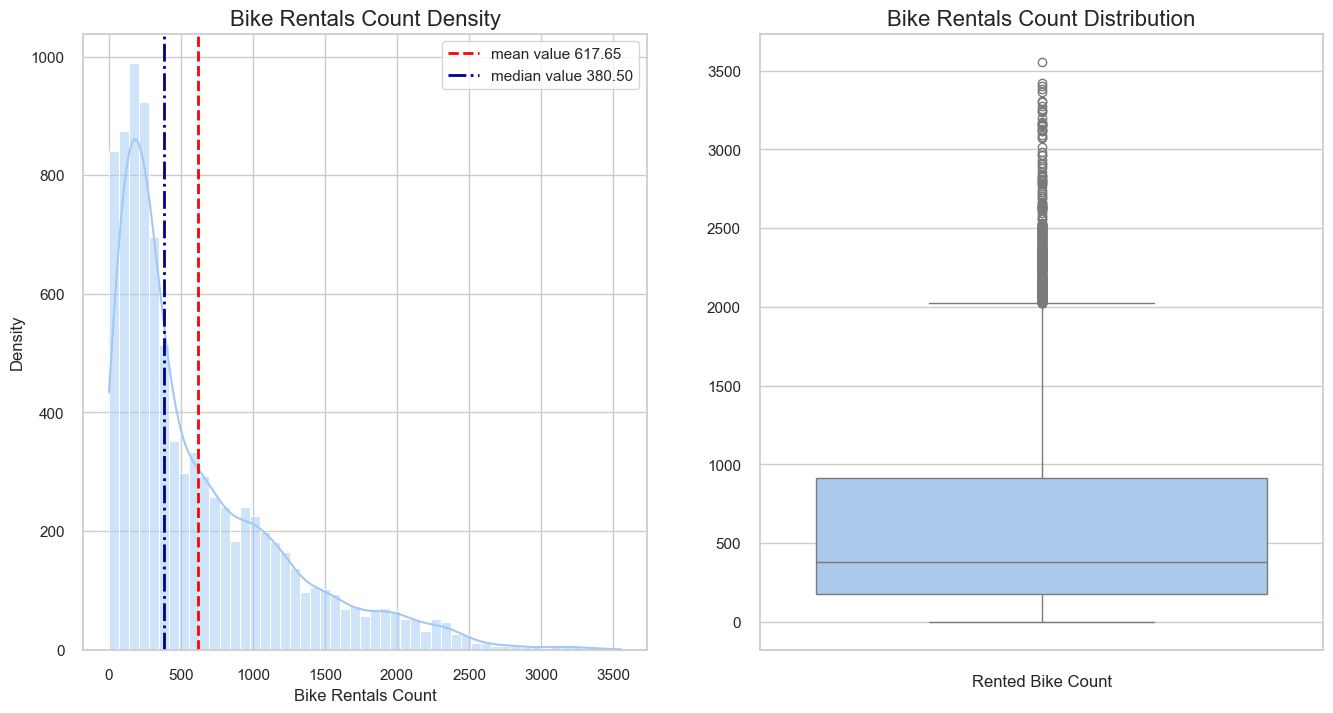

In [140]:
mean_value = train_data_encoded['Rented Bike Count'].mean()
median_value = train_data_encoded['Rented Bike Count'].median()

sns.set_style("whitegrid")
sns.set_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(16,8)) 


sns.histplot(data=train_data_encoded, x ='Rented Bike Count',ax=ax[0],kde=True)
ax[0].set_title('Bike Rentals Count Density', fontsize=16)
ax[0].axvline(mean_value, color='red',linestyle='--', linewidth=2, label= f'mean value {mean_value:.2f}')
ax[0].axvline(median_value, color='darkblue',linestyle='-.', linewidth=2, label= f'median value {median_value:.2f}')
ax[0].set_xlabel('Bike Rentals Count',fontsize=12)
ax[0].set_ylabel('Density',fontsize=12)
ax[0].legend()
ax[0].tick_params(axis='x',size=10)
ax[0].tick_params(axis='y',size=10)

sns.boxplot(data=train_data_encoded, y='Rented Bike Count',palette='pastel',ax=ax[1])
ax[1].set_title('Bike Rentals Count Distribution', fontsize=16)
ax[1].set_xlabel('Rented Bike Count',fontsize=12)
ax[1].set_ylabel('',fontsize=12)
ax[1].tick_params(axis='x',size=10)
ax[1].tick_params(axis='y',size=10)

- The distribution is right-skewed meaning that most bike rental counts are concentrated on the lower end of the scale.
- The highest density occurs at relatively low bike rental counts - most of the time the demand is relatively low.
- A long tail on the right indicates that there are some higher rental counts occurring, though they are rare - suggests occasional periods with significantly higher demand.


- **Median:** The median is closer to the lower end of the range, suggesting that at least 50% of the bike rental counts are relatively small.
- **Interquartile Range (IQR):** The spread of the data indicates moderate variability.
- **Outliers:** There are numerous outliers representing unusually high bike rental counts.

In [141]:
train_data_encoded[train_data_encoded['Rented Bike Count'] == 0]

,feat07,feat08,Humidity,Rented Bike Count,Temperature,Visibility,Log_Rainfall,Log_Snowfall,Log_Solar_Radiation,Log_Wind_speed,Hour_Weekend_3_0,Hour_Holiday_3_0,Hour_Group_Cluster_3,Month_Group_Cluster_3,Month_Group_Cluster_1,Hour_Holiday_0_0,Hour_Weekend_0_0,Hour_Group_Cluster_1,Hour_Holiday_1_0,Hour_Weekend_3_1,Hour_Weekend_0_1,Hour_Holiday_2_0,Hour_Group_Cluster_2,Month_Group_Cluster_2,Hour_Weekend_2_0,Hour_Weekend_1_0,Hour_Holiday_3_1,Weekend,Hour_Holiday_0_1,Hour_Weekend_2_1,Year_2018


Adding 1 before applying the logarithm ensures that the transformation remains valid even if there are values of 0 in the data, as the logarithm of 0 is undefined. Although we removed the non-functioning days from our dataset, resulting in no observations where the Rented Bike Count is 0, we still take this precaution to prevent potential errors in the future. Because the average Rented Bike Count is relatively high, adding 1 will not have a significant impact on the results).

In [142]:
train_data_encoded['Log_Rented_Bike_Count'] = np.log1p(train_data_encoded['Rented Bike Count']+1)
test_data_encoded['Log_Rented_Bike_Count'] = np.log(test_data_encoded['Rented Bike Count'] + 1)


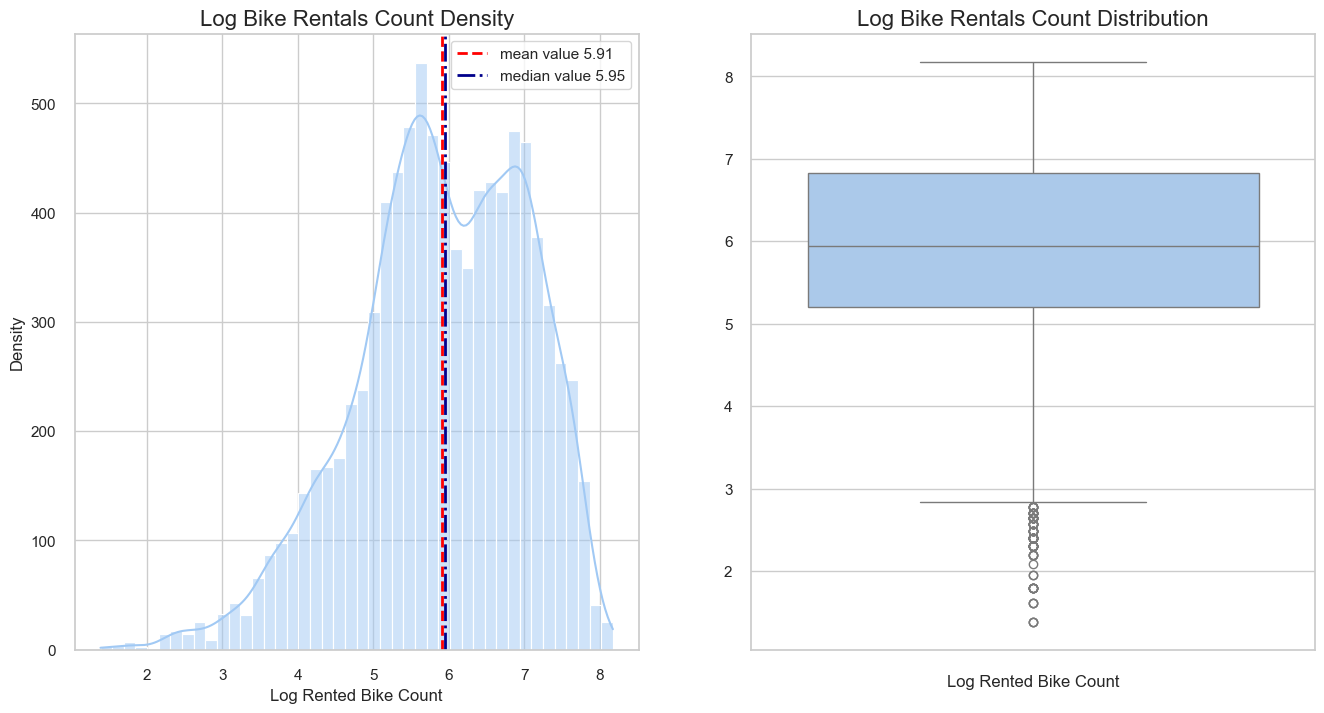

In [143]:
mean_value = train_data_encoded['Log_Rented_Bike_Count'].mean()
median_value = train_data_encoded['Log_Rented_Bike_Count'].median()

sns.set_style("whitegrid")
sns.set_palette('pastel')
fig, ax = plt.subplots(1, 2, figsize=(16,8)) 


sns.histplot(data=train_data_encoded, x ='Log_Rented_Bike_Count',ax=ax[0],kde=True)
ax[0].set_title('Log Bike Rentals Count Density', fontsize=16)
ax[0].axvline(mean_value, color='red',linestyle='--', linewidth=2, label= f'mean value {mean_value:.2f}')
ax[0].axvline(median_value, color='darkblue',linestyle='-.', linewidth=2, label= f'median value {median_value:.2f}')
ax[0].set_xlabel('Log Rented Bike Count',fontsize=12)
ax[0].set_ylabel('Density',fontsize=12)
ax[0].legend()
ax[0].tick_params(axis='x',size=10)
ax[0].tick_params(axis='y',size=10)

sns.boxplot(data=train_data_encoded, y='Log_Rented_Bike_Count',palette='pastel',ax=ax[1])
ax[1].set_title('Log Bike Rentals Count Distribution', fontsize=16)
ax[1].set_xlabel('Log Rented Bike Count',fontsize=12)
ax[1].set_ylabel('',fontsize=12)
ax[1].tick_params(axis='x',size=10)
ax[1].tick_params(axis='y',size=10)

In [144]:
train_data_encoded.drop(columns='Rented Bike Count',inplace=True)
test_data_encoded.drop(columns='Rented Bike Count',inplace=True)

In [145]:
# updating X_train and y_train 
X_names = [col for col in train_data_encoded.columns if col != 'Log_Rented_Bike_Count']

X_train = train_data_encoded[X_names]
y_train = train_data_encoded[['Log_Rented_Bike_Count']]

X_test = test_data_encoded[X_names]
y_test = test_data_encoded[['Log_Rented_Bike_Count']]

print(f"train data shape: {train_data_encoded.shape}")
print(f"train data shape: {test_data_encoded.shape}")

train data shape: (9108, 31)
train data shape: (2277, 31)


In [146]:
train_data_encoded

,feat07,feat08,Humidity,Temperature,Visibility,Log_Rainfall,Log_Snowfall,Log_Solar_Radiation,Log_Wind_speed,Hour_Weekend_3_0,Hour_Holiday_3_0,Hour_Group_Cluster_3,Month_Group_Cluster_3,Month_Group_Cluster_1,Hour_Holiday_0_0,Hour_Weekend_0_0,Hour_Group_Cluster_1,Hour_Holiday_1_0,Hour_Weekend_3_1,Hour_Weekend_0_1,Hour_Holiday_2_0,Hour_Group_Cluster_2,Month_Group_Cluster_2,Hour_Weekend_2_0,Hour_Weekend_1_0,Hour_Holiday_3_1,Weekend,Hour_Holiday_0_1,Hour_Weekend_2_1,Year_2018,Log_Rented_Bike_Count
6493,0,0,76,0,421,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,4.762174
11403,0,0,49,-13,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,4.672829
3979,0,0,27,28,2000,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,7.538495
3734,0,0,34,1,1394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,5.587249
7058,0,0,84,-1,425,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,3.295837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11621,0,0,59,31,1929,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,6.966024
4094,0,0,64,28,2000,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.436617
3492,0,0,37,-15,1985,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,3.178054
2177,0,0,55,30,2000,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.278629


In [147]:
train_data_encoded.columns

Index(['feat07', 'feat08', 'Humidity', 'Temperature', 'Visibility',
       'Log_Rainfall', 'Log_Snowfall', 'Log_Solar_Radiation', 'Log_Wind_speed',
       'Hour_Weekend_3_0', 'Hour_Holiday_3_0', 'Hour_Group_Cluster_3',
       'Month_Group_Cluster_3', 'Month_Group_Cluster_1', 'Hour_Holiday_0_0',
       'Hour_Weekend_0_0', 'Hour_Group_Cluster_1', 'Hour_Holiday_1_0',
       'Hour_Weekend_3_1', 'Hour_Weekend_0_1', 'Hour_Holiday_2_0',
       'Hour_Group_Cluster_2', 'Month_Group_Cluster_2', 'Hour_Weekend_2_0',
       'Hour_Weekend_1_0', 'Hour_Holiday_3_1', 'Weekend', 'Hour_Holiday_0_1',
       'Hour_Weekend_2_1', 'Year_2018', 'Log_Rented_Bike_Count'],
      dtype='object')

# Models

#### function for calculating model performance

In [148]:
def performance_metrics(real,predicted):
    
    mae = mean_absolute_error(real,predicted)
    mse = mean_squared_error(real,predicted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(real,predicted)*100

    return {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "Root Mean Squared Error (RMSE)": rmse,
        "Mean Absolute Percentage Error (MAPE) [%]": mape}

In [149]:
final_model_results = pd.DataFrame(columns=['Model'])

#### function to evaluate a model and store its performance metrics

In [150]:
def evaluate_and_store_metrics(model_name, model, X_test, y_test, results_df):
    
    y_pred = model.predict(X_test)
    
    metrics = performance_metrics(y_test, y_pred)
    
    new_model = {
        "Model": model_name,
        **metrics
    }

    updated_df = pd.concat([results_df, pd.DataFrame([new_model])], ignore_index=True)
    return updated_df


We start the model training process with the simplest linear models to establish a baseline for predictive performance. These models are quick to train and evaluate, allowing us to benchmark the initial results.

## Linear Regression

In [151]:
numerical_features_remaining.remove('Rented Bike Count')
print(numerical_features_remaining)
categorical_features = [col for col in X_train.columns if col not in numerical_features_remaining]

['feat07', 'feat08', 'Humidity', 'Temperature', 'Visibility', 'Log_Rainfall', 'Log_Snowfall', 'Log_Solar_Radiation', 'Log_Wind_speed']


In [152]:
scaler = StandardScaler()

# Standardizing only the continuous features
X_train_numerical_scaled = scaler.fit_transform(X_train[numerical_features_remaining])
X_test_numerical_scaled = scaler.transform(X_test[numerical_features_remaining])

# Combining continuous and categorical features
X_train_scaled = np.hstack([X_train_numerical_scaled, X_train[categorical_features]])
X_test_scaled = np.hstack([X_test_numerical_scaled, X_test[categorical_features]])


In [153]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [154]:
regression.score(X_train,y_train)
reg_pred = regression.predict(X_test)

In [155]:
performance_metrics(y_test, reg_pred)

{'Mean Absolute Error (MAE)': 0.446273077978205,
 'Mean Squared Error (MSE)': 0.4118537703007678,
 'Root Mean Squared Error (RMSE)': 0.6417583426031701,
 'Mean Absolute Percentage Error (MAPE) [%]': 9.17140067069631}

In [156]:
final_model_results = evaluate_and_store_metrics('Linear Regression',regression,  X_test, y_test, final_model_results)

In [157]:
final_model_results

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Percentage Error (MAPE) [%]
0,Linear Regression,0.446273,0.411854,0.641758,9.171401


The results from the linear regression model provide a solid baseline with MAPE already below 10%. 

## Lasso, Ridge, Elastic Net

In [158]:
# Custom scoring function
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [159]:
models = {
    'Lasso Regression': {
        "model": Lasso(max_iter=10000),
        "params": {"alpha": [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]}
    },
    'Ridge Regression': {
        "model": Ridge(max_iter=10000),
        "params": {"alpha": [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]}
    },
    'ElasticNet Regression':{
        "model": ElasticNet(max_iter=10000),
        "params": {
            "alpha": [1e-4, 1e-3, 1e-2, 0.1, 1, 10],
            "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
            }
    }
}

results = {}

In [160]:
for name, config in models.items():
    print  (config['params'].items())

dict_items([('alpha', [0.0001, 0.001, 0.01, 0.1, 1, 10, 100])])
dict_items([('alpha', [0.0001, 0.001, 0.01, 0.1, 1, 10, 100])])
dict_items([('alpha', [0.0001, 0.001, 0.01, 0.1, 1, 10]), ('l1_ratio', [0.1, 0.3, 0.5, 0.7, 0.9])])


In [161]:
# Cross-validation with data Standardization to avoid information leakage

cv = KFold(n_splits=5, shuffle = True, random_state=12345)

for name, config in models.items():
    print(f"Model {name}")

    # Creating a pipeline with standardization and the regression model

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', config['model'])
    ])
    
    # GridSearchCV for hyperparameter tuning
    grid = GridSearchCV(
        estimator = pipeline,
        param_grid={ f"model__{key}": value for key, value in config['params'].items()},
        scoring = mse_scorer,
        cv = cv,
        n_jobs = -1
    )

    # Training the model
    grid.fit(X_train, y_train)
    
    # Saving the best model and results
    results[name] = {
        "best_params": grid.best_params_,
        "best_score": -grid.best_score_,  # (negating the negative MSE)
        "best_estimator": grid.best_estimator_
    }
    
    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best cross-validated MSE for {name}: {-grid.best_score_}")



Model Lasso Regression
Best params for Lasso Regression: {'model__alpha': 0.0001}
Best cross-validated MSE for Lasso Regression: 0.37443627486493675
Model Ridge Regression
Best params for Ridge Regression: {'model__alpha': 10}
Best cross-validated MSE for Ridge Regression: 0.3744271694717888
Model ElasticNet Regression


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.799e+01, tolerance: 9.478e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.024e+01, tolerance: 9.298e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.833e+01, toler

Best params for ElasticNet Regression: {'model__alpha': 0.001, 'model__l1_ratio': 0.1}
Best cross-validated MSE for ElasticNet Regression: 0.37443325175971126


In [162]:
for name, result in results.items():
    best_model = result['best_estimator']
    final_model_results = evaluate_and_store_metrics(name, best_model, X_test, y_test, final_model_results)

final_model_results

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Percentage Error (MAPE) [%]
0,Linear Regression,0.446273,0.411854,0.641758,9.171401
1,Lasso Regression,0.446282,0.411904,0.641797,9.172140
2,Ridge Regression,0.446286,0.411933,0.641820,9.172653
3,ElasticNet Regression,0.446301,0.411977,0.641854,9.173416


All linear models (Linear, Lasso, Ridge, and ElasticNet) show comparable performance, indicating minimal benefit from regularization for this dataset.

## Decision Tree

Tree based models don't need data standardization as they are not sensitive to the data scale.

In [163]:
'''
decision_tree_params = {
    'model__max_depth': [3, 5, 10, 20, 30, 50, None],  
    'model__min_samples_split': [2, 5, 10, 20, 50],  
    'model__min_samples_leaf': [1, 2, 5, 10, 20],  
    'model__max_features': ['sqrt', 'log2', None],
    'model__max_leaf_nodes': [10, 20, 50, 100, 200, None], 
    'model__min_impurity_decrease': [0.0, 0.01, 0.1, 0.2],  
    'model__ccp_alpha': [0.0, 0.001, 0.01, 0.1],
}

decision_tree_pipeline = Pipeline([
    ('model', DecisionTreeRegressor(random_state=12345))
])


grid_search_dt = GridSearchCV(
    estimator=decision_tree_pipeline,
    param_grid=decision_tree_params,
    scoring="neg_mean_squared_error",  
    cv=5,  
    n_jobs=-1  
)

grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_
best_dt_params = grid_search_dt.best_params_
best_dt_mse = -grid_search_dt.best_score_

print(f"Best parameters for Decision Tree: {best_dt_params}")
print(f"Best cross-validated MSE: {best_dt_mse:.3f}")

'''

'\ndecision_tree_params = {\n    \'model__max_depth\': [3, 5, 10, 20, 30, 50, None],  \n    \'model__min_samples_split\': [2, 5, 10, 20, 50],  \n    \'model__min_samples_leaf\': [1, 2, 5, 10, 20],  \n    \'model__max_features\': [\'sqrt\', \'log2\', None],\n    \'model__max_leaf_nodes\': [10, 20, 50, 100, 200, None], \n    \'model__min_impurity_decrease\': [0.0, 0.01, 0.1, 0.2],  \n    \'model__ccp_alpha\': [0.0, 0.001, 0.01, 0.1],\n}\n\ndecision_tree_pipeline = Pipeline([\n    (\'model\', DecisionTreeRegressor(random_state=12345))\n])\n\n\ngrid_search_dt = GridSearchCV(\n    estimator=decision_tree_pipeline,\n    param_grid=decision_tree_params,\n    scoring="neg_mean_squared_error",  \n    cv=5,  \n    n_jobs=-1  \n)\n\ngrid_search_dt.fit(X_train, y_train)\n\nbest_dt_model = grid_search_dt.best_estimator_\nbest_dt_params = grid_search_dt.best_params_\nbest_dt_mse = -grid_search_dt.best_score_\n\nprint(f"Best parameters for Decision Tree: {best_dt_params}")\nprint(f"Best cross-validat

In [164]:
'''dump(best_dt_model, "best_decision_tree.joblib")'''

'dump(best_dt_model, "best_decision_tree.joblib")'

In [165]:
best_dt_model = load("best_decision_tree.joblib")

In [166]:
y_pred_dt = best_dt_model.predict(X_test)
dt_metrics = performance_metrics(y_test, y_pred_dt)

for metric, value in dt_metrics.items():
    print(f"{metric}: {value:.2f}")

Mean Absolute Error (MAE): 0.37
Mean Squared Error (MSE): 0.30
Root Mean Squared Error (RMSE): 0.55
Mean Absolute Percentage Error (MAPE) [%]: 7.27


In [167]:
final_model_results = evaluate_and_store_metrics("Decision Tree",best_dt_model, X_test, y_test, final_model_results)

The Decision Tree model shows better predictive performance compared to the earlier linear models. Its metrics suggest it’s better at capturing complex, non-linear patterns in the data, resulting in more accurate predictions and overall improved performance.

## Random Forest

In [168]:
'''
random_forest_params = {
    'model__n_estimators': [50, 100, 200, 500, 800, 1000, 1400, 1800, 2000], 
    'model__max_depth': [5, 10, 20, 30, 50, None], 
    'model__min_samples_split': [2, 5, 10, 20], 
    'model__min_samples_leaf': [1, 2, 5, 10], 
    'model__max_features': ['auto','sqrt', 'log2', None], 
    'model__bootstrap': [True, False],  
}


random_forest_pipeline = Pipeline([
    ('model', RandomForestRegressor(random_state=12345))
])

grid_search_rf = GridSearchCV(
    estimator=random_forest_pipeline,
    param_grid=random_forest_params,
    scoring="neg_mean_squared_error", 
    cv=5,  
    n_jobs=-1
)


grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_
best_rf_mse = -grid_search_rf.best_score_
'''

'\nrandom_forest_params = {\n    \'model__n_estimators\': [50, 100, 200, 500, 800, 1000, 1400, 1800, 2000], \n    \'model__max_depth\': [5, 10, 20, 30, 50, None], \n    \'model__min_samples_split\': [2, 5, 10, 20], \n    \'model__min_samples_leaf\': [1, 2, 5, 10], \n    \'model__max_features\': [\'auto\',\'sqrt\', \'log2\', None], \n    \'model__bootstrap\': [True, False],  \n}\n\n\nrandom_forest_pipeline = Pipeline([\n    (\'model\', RandomForestRegressor(random_state=12345))\n])\n\ngrid_search_rf = GridSearchCV(\n    estimator=random_forest_pipeline,\n    param_grid=random_forest_params,\n    scoring="neg_mean_squared_error", \n    cv=5,  \n    n_jobs=-1\n)\n\n\ngrid_search_rf.fit(X_train, y_train)\n\nbest_rf_model = grid_search_rf.best_estimator_\nbest_rf_params = grid_search_rf.best_params_\nbest_rf_mse = -grid_search_rf.best_score_\n'

In [169]:
'''dump(best_rf_model, "best_random_forest.joblib")'''

'dump(best_rf_model, "best_random_forest.joblib")'

In [170]:
best_rf_model = load("best_random_forest.joblib")

In [171]:
final_model_results = evaluate_and_store_metrics("Random Forest",best_rf_model, X_test,y_test,final_model_results)

final_model_results

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Percentage Error (MAPE) [%]
0,Linear Regression,0.446273,0.411854,0.641758,9.171401
1,Lasso Regression,0.446282,0.411904,0.641797,9.172140
2,Ridge Regression,0.446286,0.411933,0.641820,9.172653
3,ElasticNet Regression,0.446301,0.411977,0.641854,9.173416
4,Decision Tree,0.366349,0.297595,0.545523,7.274985
5,Random Forest,0.232819,0.178453,0.422437,4.440581


The Random Forest model significantly outperforms the previously tested models, including both linear and Decision Tree approaches. 

## Bagging

In [172]:
'''
bagging_params = {
    'model__n_estimators': [10, 50, 100, 200, 300, 500], 
    'model__max_samples': [0.5, 0.7, 0.8, 1.0],  
    'model__max_features': [0.5, 0.7, 0.8, 1.0], 
    'model__bootstrap': [True, False], 
    'model__bootstrap_features': [True, False], 
}

pipeline_bagging = Pipeline([
    ('model', BaggingRegressor(random_state=12345))
])


grid_search_bagging = GridSearchCV(
    estimator=pipeline_bagging,
    param_grid=bagging_params,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)


grid_search_bagging.fit(X_train, y_train)


best_bagging_model = grid_search_bagging.best_estimator_
best_bagging_params = grid_search_bagging.best_params_
best_bagging_mse = -grid_search_bagging.best_score_

print(f"Best parameters for Bagging Regressor: {best_bagging_params}")
print(f"Best cross-validated MSE: {best_bagging_mse:.3f}")
'''


'\nbagging_params = {\n    \'model__n_estimators\': [10, 50, 100, 200, 300, 500], \n    \'model__max_samples\': [0.5, 0.7, 0.8, 1.0],  \n    \'model__max_features\': [0.5, 0.7, 0.8, 1.0], \n    \'model__bootstrap\': [True, False], \n    \'model__bootstrap_features\': [True, False], \n}\n\npipeline_bagging = Pipeline([\n    (\'model\', BaggingRegressor(random_state=12345))\n])\n\n\ngrid_search_bagging = GridSearchCV(\n    estimator=pipeline_bagging,\n    param_grid=bagging_params,\n    scoring="neg_mean_squared_error",\n    cv=5,\n    n_jobs=-1\n)\n\n\ngrid_search_bagging.fit(X_train, y_train)\n\n\nbest_bagging_model = grid_search_bagging.best_estimator_\nbest_bagging_params = grid_search_bagging.best_params_\nbest_bagging_mse = -grid_search_bagging.best_score_\n\nprint(f"Best parameters for Bagging Regressor: {best_bagging_params}")\nprint(f"Best cross-validated MSE: {best_bagging_mse:.3f}")\n'

In [173]:
'''dump(best_bagging_model, "best_bagging_model.joblib")'''

'dump(best_bagging_model, "best_bagging_model.joblib")'

In [174]:
best_bagging_model = load("best_bagging_model.joblib")

In [175]:
final_model_results = evaluate_and_store_metrics("Bagging Regressor",best_bagging_model,X_test,y_test,final_model_results)

In [176]:
final_model_results

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Percentage Error (MAPE) [%]
0,Linear Regression,0.446273,0.411854,0.641758,9.171401
1,Lasso Regression,0.446282,0.411904,0.641797,9.172140
2,Ridge Regression,0.446286,0.411933,0.641820,9.172653
3,ElasticNet Regression,0.446301,0.411977,0.641854,9.173416
4,Decision Tree,0.366349,0.297595,0.545523,7.274985
5,Random Forest,0.232819,0.178453,0.422437,4.440581
6,Bagging Regressor,0.255353,0.189003,0.434745,5.000892


The Bagging Regressor slightly underperforms compared to the Random Forest, however, its performance remains competitive and demonstrates the effectiveness of ensemble methods.

## XGBOOST

In [177]:
'''
xgb_params = {
    'model__n_estimators': [100, 300, 500 ,700],  
    'model__learning_rate': [0.01, 0.05, 0.1], 
    'model__max_depth': [3, 5, 7, 10],  
    'model__subsample': [0.8, 1.0], 
    'model__colsample_bytree': [0.8, 1.0], 
    'model__gamma': [0, 0.1 ],
    'model__min_child_weight': [1, 5],  
    'model__tree_method': ['hist']
}


pipeline_xgb = Pipeline([
    ('model', XGBRegressor(random_state=12345))
])

grid_search_xgb = GridSearchCV(
    estimator=pipeline_xgb,
    param_grid=xgb_params,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

grid_search_xgb.fit(X_train ,y_train)
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
best_xgb_mse = -grid_search_xgb.best_score_
'''

'\nxgb_params = {\n    \'model__n_estimators\': [100, 300, 500 ,700],  \n    \'model__learning_rate\': [0.01, 0.05, 0.1], \n    \'model__max_depth\': [3, 5, 7, 10],  \n    \'model__subsample\': [0.8, 1.0], \n    \'model__colsample_bytree\': [0.8, 1.0], \n    \'model__gamma\': [0, 0.1 ],\n    \'model__min_child_weight\': [1, 5],  \n    \'model__tree_method\': [\'hist\']\n}\n\n\npipeline_xgb = Pipeline([\n    (\'model\', XGBRegressor(random_state=12345))\n])\n\ngrid_search_xgb = GridSearchCV(\n    estimator=pipeline_xgb,\n    param_grid=xgb_params,\n    scoring="neg_mean_squared_error",\n    cv=5,\n    n_jobs=-1\n)\n\ngrid_search_xgb.fit(X_train ,y_train)\nbest_xgb_model = grid_search_xgb.best_estimator_\nbest_xgb_params = grid_search_xgb.best_params_\nbest_xgb_mse = -grid_search_xgb.best_score_\n'

In [178]:
''' dump(best_xgb_model, "best_xgb_model.joblib") ''' 

' dump(best_xgb_model, "best_xgb_model.joblib") '

In [179]:
best_xgb_model = load("best_xgb_model.joblib")
final_model_results = evaluate_and_store_metrics("XGBoost",best_xgb_model,X_test,y_test,final_model_results)

In [180]:
final_model_results

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Percentage Error (MAPE) [%]
0,Linear Regression,0.446273,0.411854,0.641758,9.171401
1,Lasso Regression,0.446282,0.411904,0.641797,9.172140
2,Ridge Regression,0.446286,0.411933,0.641820,9.172653
3,ElasticNet Regression,0.446301,0.411977,0.641854,9.173416
4,Decision Tree,0.366349,0.297595,0.545523,7.274985
5,Random Forest,0.232819,0.178453,0.422437,4.440581
6,Bagging Regressor,0.255353,0.189003,0.434745,5.000892
7,XGBoost,0.248134,0.195965,0.442679,4.746708


The XGBoost model demonstrates slightly worse, but still comparable performance to the Random Forest.

## Gradient Boost

In [181]:
''' 
gboost_params = {
    'model__n_estimators': [100, 300, 500, 700],  
    'model__learning_rate': [0.01, 0.05, 0.1],  
    'model__max_depth': [3, 5, 7, 10], 
    'model__subsample': [0.6, 0.8, 1.0], 
    'model__min_samples_split': [2, 5, 10], 
    'model__min_samples_leaf': [1, 2, 5], 
}

pipeline_gboost = Pipeline([
    ('model', GradientBoostingRegressor(random_state=12345))
])

grid_search_gboost = GridSearchCV(
    estimator=pipeline_gboost,
    param_grid=gboost_params,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

grid_search_gboost.fit(X_train, y_train)

best_gboost_model = grid_search_gboost.best_estimator_
'''

' \ngboost_params = {\n    \'model__n_estimators\': [100, 300, 500, 700],  \n    \'model__learning_rate\': [0.01, 0.05, 0.1],  \n    \'model__max_depth\': [3, 5, 7, 10], \n    \'model__subsample\': [0.6, 0.8, 1.0], \n    \'model__min_samples_split\': [2, 5, 10], \n    \'model__min_samples_leaf\': [1, 2, 5], \n}\n\npipeline_gboost = Pipeline([\n    (\'model\', GradientBoostingRegressor(random_state=12345))\n])\n\ngrid_search_gboost = GridSearchCV(\n    estimator=pipeline_gboost,\n    param_grid=gboost_params,\n    scoring="neg_mean_squared_error",\n    cv=5,\n    n_jobs=-1\n)\n\ngrid_search_gboost.fit(X_train, y_train)\n\nbest_gboost_model = grid_search_gboost.best_estimator_\n'

In [182]:
''' dump(best_gboost_model, 'best_gboost_model.joblib') '''

" dump(best_gboost_model, 'best_gboost_model.joblib') "

In [183]:
best_gboost_model = load('best_gboost_model.joblib')

final_model_results = evaluate_and_store_metrics("Gradient Boosting",best_gboost_model,X_test,y_test,final_model_results)

In [184]:
final_model_results

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Percentage Error (MAPE) [%]
0,Linear Regression,0.446273,0.411854,0.641758,9.171401
1,Lasso Regression,0.446282,0.411904,0.641797,9.172140
2,Ridge Regression,0.446286,0.411933,0.641820,9.172653
3,ElasticNet Regression,0.446301,0.411977,0.641854,9.173416
4,Decision Tree,0.366349,0.297595,0.545523,7.274985
5,Random Forest,0.232819,0.178453,0.422437,4.440581
6,Bagging Regressor,0.255353,0.189003,0.434745,5.000892
7,XGBoost,0.248134,0.195965,0.442679,4.746708
8,Gradient Boosting,0.270464,0.200006,0.447221,5.236457


The Gradient Boosting model shows a bit lower performance compared to Random Forest and XGBoost, indicating it is less effective at capturing the underlying patterns in the data.

## AdaBoost

In [185]:
''' 
pipeline_adaboost = Pipeline([
    ('model', AdaBoostRegressor(
        estimator=DecisionTreeRegressor(random_state=12345),
        random_state=12345
    ))
])


adaboost_params = {
    'model__n_estimators': [100, 300, 500 , 700 ,1000],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__estimator__max_depth': [3, 5, 7, 10],
    'model__estimator__min_samples_split': [2, 5, 7],
    'model__estimator__min_samples_leaf': [1, 2, 5],
}

grid_search_adaboost = GridSearchCV(
    estimator=pipeline_adaboost,
    param_grid=adaboost_params,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)


grid_search_adaboost.fit(X_train, y_train)
best_adaboost_model = grid_search_adaboost.best_estimator_
'''

' \npipeline_adaboost = Pipeline([\n    (\'model\', AdaBoostRegressor(\n        estimator=DecisionTreeRegressor(random_state=12345),\n        random_state=12345\n    ))\n])\n\n\nadaboost_params = {\n    \'model__n_estimators\': [100, 300, 500 , 700 ,1000],\n    \'model__learning_rate\': [0.01, 0.05, 0.1],\n    \'model__estimator__max_depth\': [3, 5, 7, 10],\n    \'model__estimator__min_samples_split\': [2, 5, 7],\n    \'model__estimator__min_samples_leaf\': [1, 2, 5],\n}\n\ngrid_search_adaboost = GridSearchCV(\n    estimator=pipeline_adaboost,\n    param_grid=adaboost_params,\n    scoring="neg_mean_squared_error",\n    cv=5,\n    n_jobs=-1\n)\n\n\ngrid_search_adaboost.fit(X_train, y_train)\nbest_adaboost_model = grid_search_adaboost.best_estimator_\n'

In [186]:
''' dump(best_adaboost_model, 'best_adaboost_model.joblib') '''

" dump(best_adaboost_model, 'best_adaboost_model.joblib') "

In [187]:
best_adaboost_model = load('best_adaboost_model.joblib')
final_model_results = evaluate_and_store_metrics("AdaBoost",best_adaboost_model,X_test,y_test,final_model_results)

In [188]:
final_model_results

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Percentage Error (MAPE) [%]
0,Linear Regression,0.446273,0.411854,0.641758,9.171401
1,Lasso Regression,0.446282,0.411904,0.641797,9.172140
2,Ridge Regression,0.446286,0.411933,0.641820,9.172653
3,ElasticNet Regression,0.446301,0.411977,0.641854,9.173416
4,Decision Tree,0.366349,0.297595,0.545523,7.274985
5,Random Forest,0.232819,0.178453,0.422437,4.440581
6,Bagging Regressor,0.255353,0.189003,0.434745,5.000892
7,XGBoost,0.248134,0.195965,0.442679,4.746708
8,Gradient Boosting,0.270464,0.200006,0.447221,5.236457
9,AdaBoost,0.325710,0.219649,0.468667,6.194704


AdaBoost performs less effectively compared to other ensemble methods like Random Forest and XGBoost, with noticeably higher error metrics.

## Cat Boost

In [189]:
'''
catboost_params = {
    'iterations': [100, 300, 500, 700, 1000, 1400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}

catboost_model = CatBoostRegressor(random_state=12345, verbose=0)

grid_search_catboost = GridSearchCV(
    estimator=catboost_model,
    param_grid=catboost_params,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

grid_search_catboost.fit(X_train, y_train)
best_catboost_model = grid_search_catboost.best_estimator_
'''


'\ncatboost_params = {\n    \'iterations\': [100, 300, 500, 700, 1000, 1400],\n    \'learning_rate\': [0.01, 0.05, 0.1, 0.2],\n    \'max_depth\': [3, 5, 7, 10],\n    \'l2_leaf_reg\': [1, 3, 5, 7],\n    \'border_count\': [32, 64, 128]\n}\n\ncatboost_model = CatBoostRegressor(random_state=12345, verbose=0)\n\ngrid_search_catboost = GridSearchCV(\n    estimator=catboost_model,\n    param_grid=catboost_params,\n    scoring="neg_mean_squared_error",\n    cv=5,\n    n_jobs=-1\n)\n\ngrid_search_catboost.fit(X_train, y_train)\nbest_catboost_model = grid_search_catboost.best_estimator_\n'

In [190]:
''' dump(best_catboost_model, 'best_catboost_model.joblib') '''

" dump(best_catboost_model, 'best_catboost_model.joblib') "

In [191]:
best_catboost_model = load('best_catboost_model.joblib')
final_model_results = evaluate_and_store_metrics("CatBoost",best_catboost_model,X_test,y_test,final_model_results)

In [192]:
final_model_results

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Percentage Error (MAPE) [%]
0,Linear Regression,0.446273,0.411854,0.641758,9.171401
1,Lasso Regression,0.446282,0.411904,0.641797,9.172140
2,Ridge Regression,0.446286,0.411933,0.641820,9.172653
3,ElasticNet Regression,0.446301,0.411977,0.641854,9.173416
4,Decision Tree,0.366349,0.297595,0.545523,7.274985
5,Random Forest,0.232819,0.178453,0.422437,4.440581
6,Bagging Regressor,0.255353,0.189003,0.434745,5.000892
7,XGBoost,0.248134,0.195965,0.442679,4.746708
8,Gradient Boosting,0.270464,0.200006,0.447221,5.236457
9,AdaBoost,0.325710,0.219649,0.468667,6.194704


CatBoost demonstrates competitive performance, closely matching XGBoost, making it a strong contender among ensemble models.

## LightGBM

In [193]:

''' lgbm_params = {
    'n_estimators': [300, 500 ],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 10],
    'min_child_samples': [10,30, 50],
  #  'reg_alpha': [0, 0.1, 1], 
  #  'reg_lambda': [0, 0.1, 1],
    'subsample': [ 0.8, 0.9 ],  
    'colsample_bytree': [0.8, 0.9 ]
}

lgbm_model = LGBMRegressor(random_state=12345)

grid_search_lgbm = GridSearchCV(
    estimator=lgbm_model,
    param_grid=lgbm_params,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

grid_search_lgbm.fit(X_train, y_train)

best_lgbm_model = grid_search_lgbm.best_estimator_
'''


' lgbm_params = {\n    \'n_estimators\': [300, 500 ],\n    \'learning_rate\': [0.01, 0.05, 0.1],\n    \'max_depth\': [5, 7, 10],\n    \'min_child_samples\': [10,30, 50],\n  #  \'reg_alpha\': [0, 0.1, 1], \n  #  \'reg_lambda\': [0, 0.1, 1],\n    \'subsample\': [ 0.8, 0.9 ],  \n    \'colsample_bytree\': [0.8, 0.9 ]\n}\n\nlgbm_model = LGBMRegressor(random_state=12345)\n\ngrid_search_lgbm = GridSearchCV(\n    estimator=lgbm_model,\n    param_grid=lgbm_params,\n    scoring="neg_mean_squared_error",\n    cv=5,\n    n_jobs=-1\n)\n\ngrid_search_lgbm.fit(X_train, y_train)\n\nbest_lgbm_model = grid_search_lgbm.best_estimator_\n'

In [194]:
''' dump(best_lgbm_model, 'best_lgbm_model.joblib') '''

" dump(best_lgbm_model, 'best_lgbm_model.joblib') "

In [195]:
best_lgbm_model = load('best_lgbm_model.joblib')

In [196]:
final_model_results = evaluate_and_store_metrics("LightGBM",best_lgbm_model,X_test,y_test,final_model_results)

In [197]:
final_model_results

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Percentage Error (MAPE) [%]
0,Linear Regression,0.446273,0.411854,0.641758,9.171401
1,Lasso Regression,0.446282,0.411904,0.641797,9.172140
2,Ridge Regression,0.446286,0.411933,0.641820,9.172653
3,ElasticNet Regression,0.446301,0.411977,0.641854,9.173416
4,Decision Tree,0.366349,0.297595,0.545523,7.274985
5,Random Forest,0.232819,0.178453,0.422437,4.440581
6,Bagging Regressor,0.255353,0.189003,0.434745,5.000892
7,XGBoost,0.248134,0.195965,0.442679,4.746708
8,Gradient Boosting,0.270464,0.200006,0.447221,5.236457
9,AdaBoost,0.325710,0.219649,0.468667,6.194704


## Multi-Layered Perceptron

Due to the significant amount  of time required to perform hyperparameter optimization using cross validation for all the hyperparameters listed below,  RandomizedSearchCV was applied. Unlike GridSearchCV, which evaluates all possible combinations of hyperparameter values, RandomizedSearchCV samples a fixed number of hyperparameter combinations randomly.  This approach significantly reduces computation time while still exploring a diverse range of hyperparameters.

In [198]:
''' 
mlp_params = {
    'model__hidden_layer_sizes': [
        (50,), (100,), (50, 50), (100, 100),  # Common layer configurations
        (300, 250, 200, 100, 50),
       (500, 400, 300, 200, 100),  # Deeper configurations
       (400, 400, 400, 400),  # Wide and deep network
       (200, 200, 200, 200)  # Medium-sized deep network
    ],
    'model__activation': ['relu', 'tanh'],  
    'model__solver': ['adam'], 
    'model__learning_rate': ['constant', 'adaptive'], 
    'model__alpha': [0.001, 0.01, 0.1], 
    'model__batch_size': [64, 128, 512, 'auto'],
    'model__early_stopping': [True, False], 
    'model__max_iter': [200,300, 500], 
    'model__learning_rate_init': [0.01,0.05, 0.1],
}

pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPRegressor(max_iter=1000, random_state=12345))
])

random_search_mlp = RandomizedSearchCV(
    estimator=pipeline_mlp,
    param_distributions=mlp_params,
    scoring="neg_mean_squared_error",
    cv=5,
    n_iter = 50,
    n_jobs=-1
)

random_search_mlp.fit(X_train, y_train)
best_mlp_model = random_search_mlp.best_estimator_
'''


' \nmlp_params = {\n    \'model__hidden_layer_sizes\': [\n        (50,), (100,), (50, 50), (100, 100),  # Common layer configurations\n        (300, 250, 200, 100, 50),\n       (500, 400, 300, 200, 100),  # Deeper configurations\n       (400, 400, 400, 400),  # Wide and deep network\n       (200, 200, 200, 200)  # Medium-sized deep network\n    ],\n    \'model__activation\': [\'relu\', \'tanh\'],  \n    \'model__solver\': [\'adam\'], \n    \'model__learning_rate\': [\'constant\', \'adaptive\'], \n    \'model__alpha\': [0.001, 0.01, 0.1], \n    \'model__batch_size\': [64, 128, 512, \'auto\'],\n    \'model__early_stopping\': [True, False], \n    \'model__max_iter\': [200,300, 500], \n    \'model__learning_rate_init\': [0.01,0.05, 0.1],\n}\n\npipeline_mlp = Pipeline([\n    (\'scaler\', StandardScaler()),\n    (\'model\', MLPRegressor(max_iter=1000, random_state=12345))\n])\n\nrandom_search_mlp = RandomizedSearchCV(\n    estimator=pipeline_mlp,\n    param_distributions=mlp_params,\n    sco

In [199]:
''' dump(best_mlp_model, 'best_mlp_model.joblib') ''' 

" dump(best_mlp_model, 'best_mlp_model.joblib') "

In [200]:
best_mlp_model = load('best_mlp_model.joblib')

In [201]:
final_model_results = evaluate_and_store_metrics("MLP Regressor",best_mlp_model,X_test,y_test,final_model_results)

In [202]:
final_model_results

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Percentage Error (MAPE) [%]
0,Linear Regression,0.446273,0.411854,0.641758,9.171401
1,Lasso Regression,0.446282,0.411904,0.641797,9.172140
2,Ridge Regression,0.446286,0.411933,0.641820,9.172653
3,ElasticNet Regression,0.446301,0.411977,0.641854,9.173416
4,Decision Tree,0.366349,0.297595,0.545523,7.274985
5,Random Forest,0.232819,0.178453,0.422437,4.440581
6,Bagging Regressor,0.255353,0.189003,0.434745,5.000892
7,XGBoost,0.248134,0.195965,0.442679,4.746708
8,Gradient Boosting,0.270464,0.200006,0.447221,5.236457
9,AdaBoost,0.325710,0.219649,0.468667,6.194704


The MLP Regressor shows noticeably worse performance compared to other models like CatBoost, XGBoost, and Random Forest. This is likely due to the MLP's sensitivity to hyperparameters, the relatively small size of the training dataset and potential difficulty in capturing the patterns in the data compared to gradient boosting and ensemble methods.

## Conclusion

- The results indicate that linear models (Linear Regression, Lasso, Ridge, ElasticNet) perform similarly, with relatively high errors and limited ability to capture the non-linear relationships in the data. 

- In contrast, tree-based models, especially ensemble methods like Random Forest, XGBoost, and CatBoost, significantly outperform linear models. Random Forest achieves the best overall metrics, demonstrating its ability to handle complex patterns and interactions. 

- Simple Decision Trees perform moderately, as they are prone to overfitting and often lack the robustness needed to generalize well to unseen data. Boosting methods, such as Gradient Boosting, XGBoost, and CatBoost, effectively address this limitation by sequentially combining weak learners to reduce bias and variance, resulting in more accurate and stable predictions. 

- Similarly, bagging techniques, like Random Forest, aggregate predictions from multiple trees to enhance generalization and reduce the risk of overfitting. These ensemble approaches leverage the strengths of Decision Trees while mitigating their weaknesses, making them highly effective for capturing complex patterns in data.

- The MLP Regressor shows intermediate performance, suggesting that while neural networks have potential, further tuning may be required to achieve results comparable to the best tree-based methods. 

Based on the values of the analyzed performance metrics, Random Forest is chosen as the final model for predicting Rented Bike Count. It delivered the lowest errors across all metrics, making it the most reliable and accurate choice for the task at hand.

## Non-Functional Days Prediction

Now we manually add predictions for the Non-Functional days.

In [203]:
print(test_functioning_no.shape[0])

59


There are only 59 observations in the test set where the Functional Day == 0

In [204]:
test_functioning_no['Predicted Bike Count'] = 0

Mean Absolute Error (MAE) for non-functional days: 0.0
Mean Squared Error (MSE) for non-functional days: 0.0


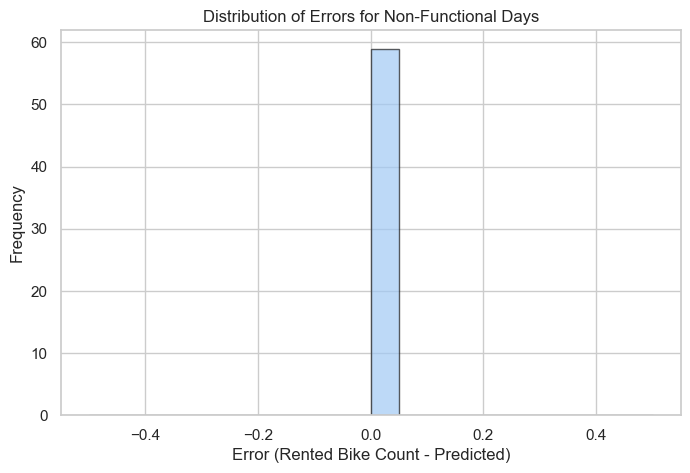

In [205]:
test_functioning_no['Error'] = test_functioning_no['Rented Bike Count'] - test_functioning_no['Predicted Bike Count']

# Obliczenie metryk błędu dla manualnych predykcji
mae_no_func = test_functioning_no['Error'].abs().mean()
mse_no_func = (test_functioning_no['Error'] ** 2).mean()

print(f"Mean Absolute Error (MAE) for non-functional days: {mae_no_func}")
print(f"Mean Squared Error (MSE) for non-functional days: {mse_no_func}")

plt.figure(figsize=(8, 5))
plt.hist(test_functioning_no['Error'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Errors for Non-Functional Days')
plt.xlabel('Error (Rented Bike Count - Predicted)')
plt.ylabel('Frequency')
plt.show()

All non-functioning days always have zero bike rentals, so manually predicting 0 is simpler and guarantees perfect accuracy. These days make up a very small percentage of the dataset, meaning a trained model would struggle to predict them due to limited data and lack of variability. Features like weather or time are irrelevant on non-functioning days, and including them in the model could confuse it or reduce its performance on functional days. Manual prediction avoids these issues and keeps the process reliable and straightforward.

## Final Conclusions

This project explored multiple approaches to predicting bike-sharing demand. Linear models struggled to capture the non-linear relationships in the data, leading to higher errors. Ensemble methods like Random Forest, XGBoost, and CatBoost outperformed them by effectively capturing complex patterns and interactions. Among these, Random Forest stood out as the best one, achieving the lowest errors across all metrics.

Extensive feature selection and engineering played a crucial role in improving model performance. Transformations such as log-scaling, interaction terms, and clustering contributed to the model's ability to generalize and deliver accurate predictions.

For non-functioning days, where no rentals occur, a manual prediction approach was used. This ensured perfect accuracy while simplifying the workflow, allowing the model to focus on functional days where variability in demand exists.

By combining advanced feature selection and engineering with robust modeling techniques this project delivered accurate and actionable predictions. These insights can support better resource allocation, operational planning, and optimization of bike-sharing services. 

Future work could explore further optimization of the models, particularly refining the MLP Regressor to better realize its capabilities, which were not fully demonstrated in this project. Adjusting hyperparameters and improving its architecture could help the MLP compete more effectively with ensemble methods.